# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
#Libraries to hlp with reading and manipulating data
import numpy as np
import pandas as pd

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option('display.max_columns', None)
# Sets the limit for the number of displayed rows
pd.set_option('display.max_rows', 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compote cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/My Drive/Colab Notebooks/Unsupervised Learning/Week 2

trade = pd.read_csv('stock_data.csv')

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/Unsupervised Learning/Week 2


## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [ ]:
trade.shape

(340, 15)

* The dataset has 229 rows and 22 columns

### Displaying few rows of the dataset

In [ ]:
# viewing a random sample of the dataset
trade.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

### Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to orginial data
trade1 = trade.copy()

### Checking the data types of the columns for the dataset

In [ ]:
# checking datatypes and number of non-null values for each column
trade1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* We have 4 objects and 11 numerical columns

### Let's take a look at the summary of the data

In [ ]:
# Let's look at the statistical summary of the data
trade1.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

**Observations**

- There are 340 rows from 11 different economic sectors defined by the Global Industry Classificantion Standard (GICS).
- There are 104 differect sub industries defined by the Global Industry Classificantion Standard (GICS).
- According to Investopedia.com, a P/B ratio of 1.0 is solid, however, there appears to be a number of companies a -76 meaning that company or those companies are viewed negativiely by the investors.  The mean on the P/B ratio of -1.71 seems reasonable as some companies trade at a lower amountthan their book value.
- The P/E Ratio seems to be within standard but the max is very high and probably represents one or a couple of companies.
- Net income appears to in standard, but there are some companies that are in the negative when looking at the minimum.
- Earnings Per Share: Overall positive but the minimum shows that some companies shares in trading negative indicating poor performance
- Price change: The minimum and 25% are in the negative after 13 weeks.

### Let's see if there are any missing values

In [ ]:
trade1.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no missing values

### Unique Values

In [ ]:
trade1.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(trade1, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of the figure (default (12,7))
    kde: whether to the show denisity curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, # Number of rows of the subplot grid = 2
        sharex=True, # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    ) # creating the 2 subplots
    sns.boxplot(
        data=trade1, x=feature, ax=ax_box2, showmeans=True, color='violet'
    ) #boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=trade1, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=trade1, x=feature, kde=kde, ax=ax_hist2
    ) #For histogram
    ax_hist2.axvline(
        trade1[feature].mean(), color='green', linestyle="--"
    ) # add mean to the histogram
    ax_hist2.axvline(
        trade1[feature].median(), color='black', linestyle="-"
    ) #add median to the histogram

**Current Price**

1. What does the distribution of stock prices look like?

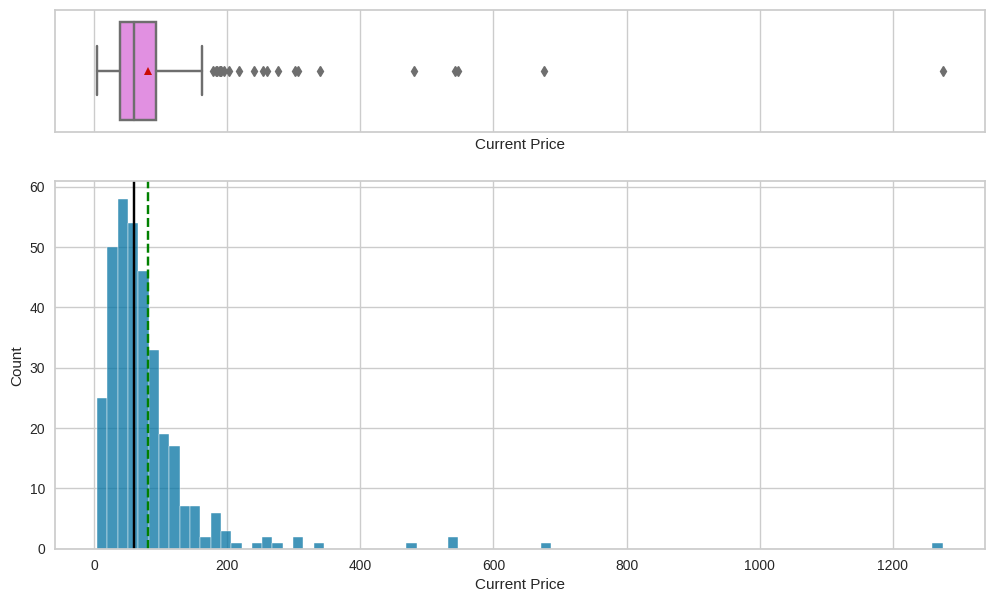

In [ ]:
histogram_boxplot(trade1, "Current Price")

* Current Price range is slightly higher zero to ~ approx 1300
* most of the values are within the 0 - 200 range
* Also has outliers with a extremely long right tail

**Volatility**

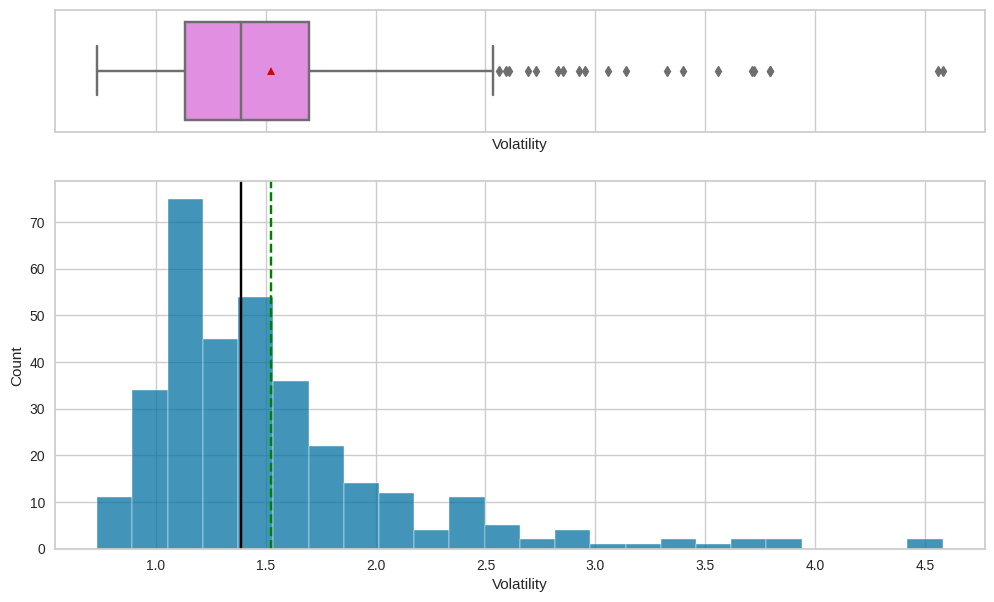

In [ ]:
histogram_boxplot(trade1, "Volatility")

* Volatility has a meadian around 1.4 and mean of 1.5
* majority of sectors are between .5 and 2.0
* outliers are present
* right skewed

**ROE**

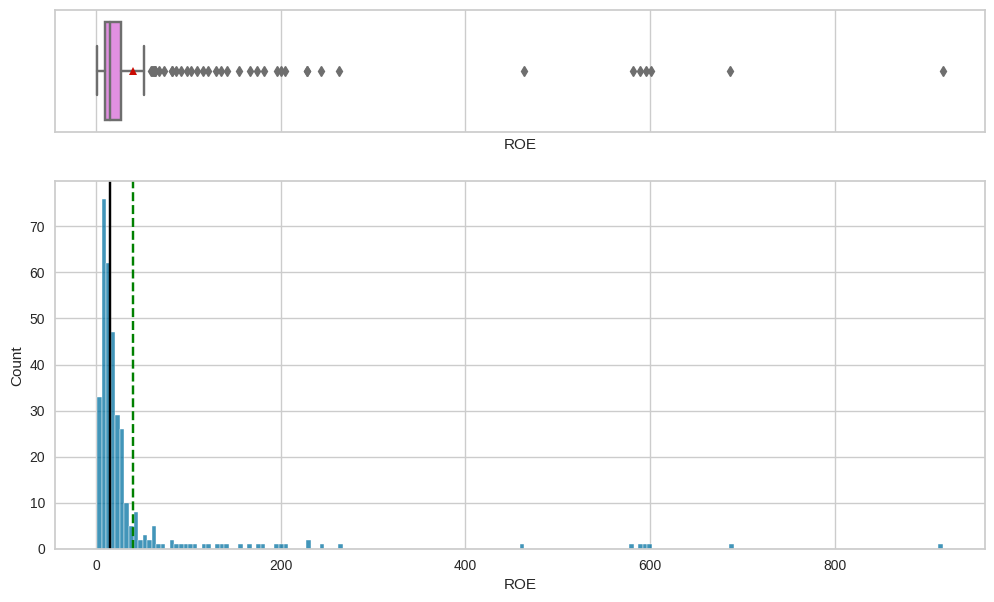

In [ ]:
histogram_boxplot(trade1, "ROE")

* majority of values are between 0 and 50
* is right skewed with outliers
* has a median of 20 and mean of 40

**Cash Ratio**

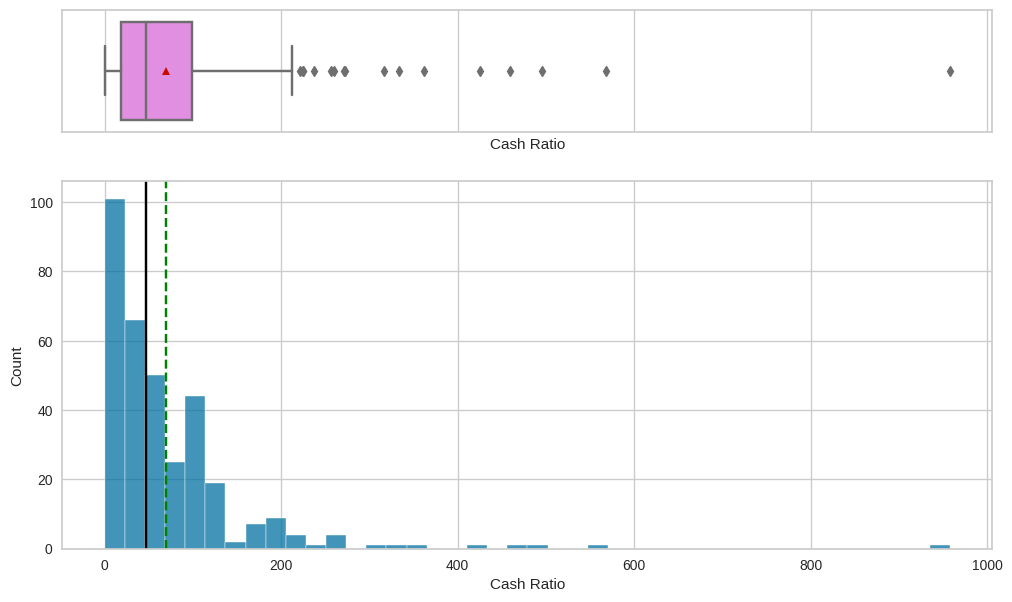

In [ ]:
histogram_boxplot(trade1, "Cash Ratio")

* Cash flow ranges between 0 - 1000
* majority of values are between 0-150
* outliers are present
* right skewed

**Net Cash Flow**

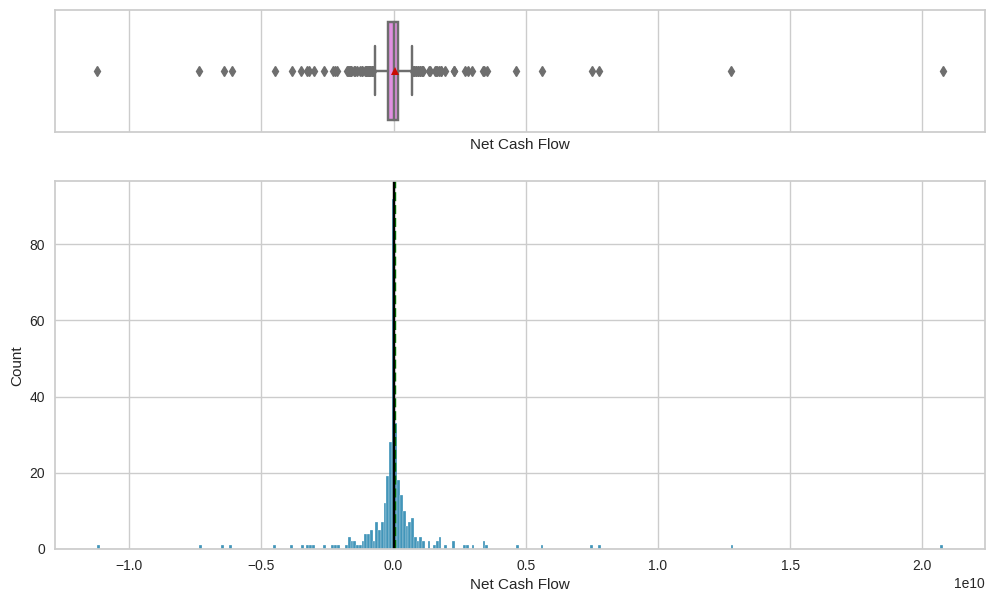

In [ ]:
histogram_boxplot(trade1, "Net Cash Flow")

* has a normal distribution
* majority of values are between -.25 and 25
* outliers are present to the left and right
* mean and median are at 0.00 meaning companies are breaking even

**Net Income**

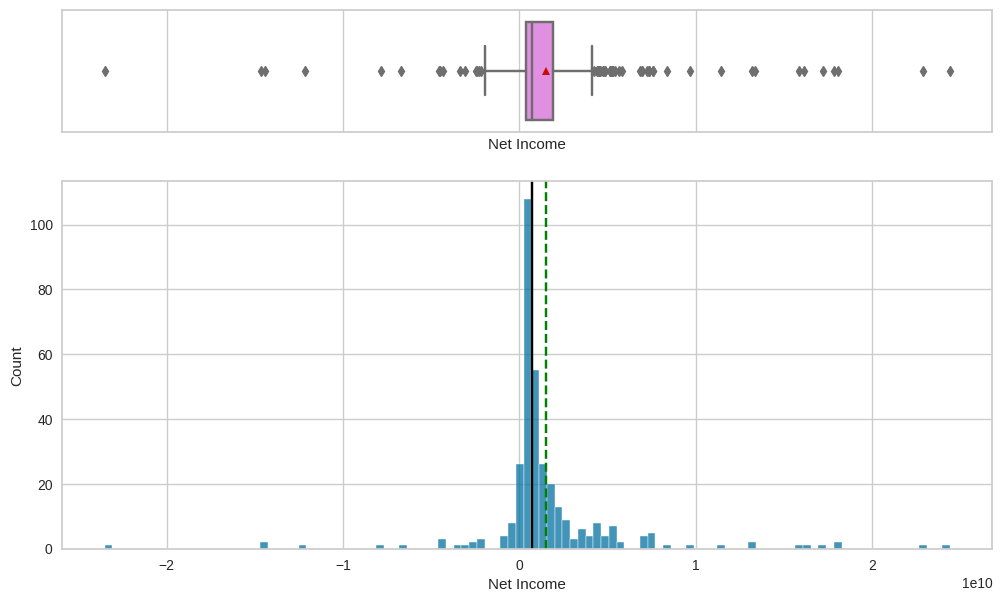

In [ ]:
histogram_boxplot(trade1, "Net Income")

* looks a like normal distribution mimics cash flow
* ranges from -2.5(1e10) - 2.5(1e10)
* majority of values -.25 to .25
* median around .10(1e10) and mean .15(1e10)

**Earnings Per Share**

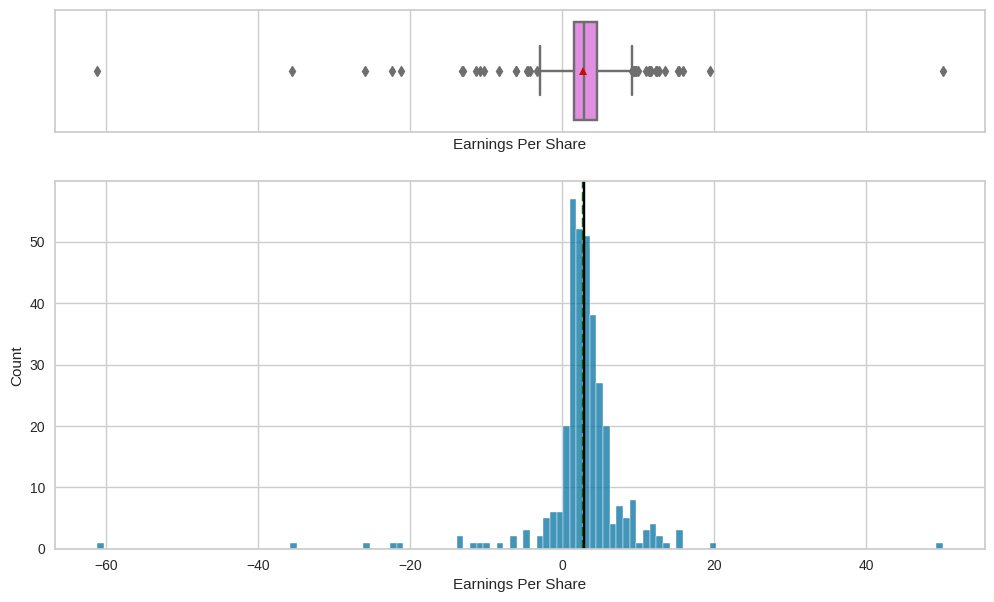

In [ ]:
histogram_boxplot(trade1, "Earnings Per Share")

* has a normal distribution
* earnings per share are between -60 and 50
* majority of earnings are -15 to 15
* mean and median sit arounf 5-6

**Estimated Shares Outstanding**

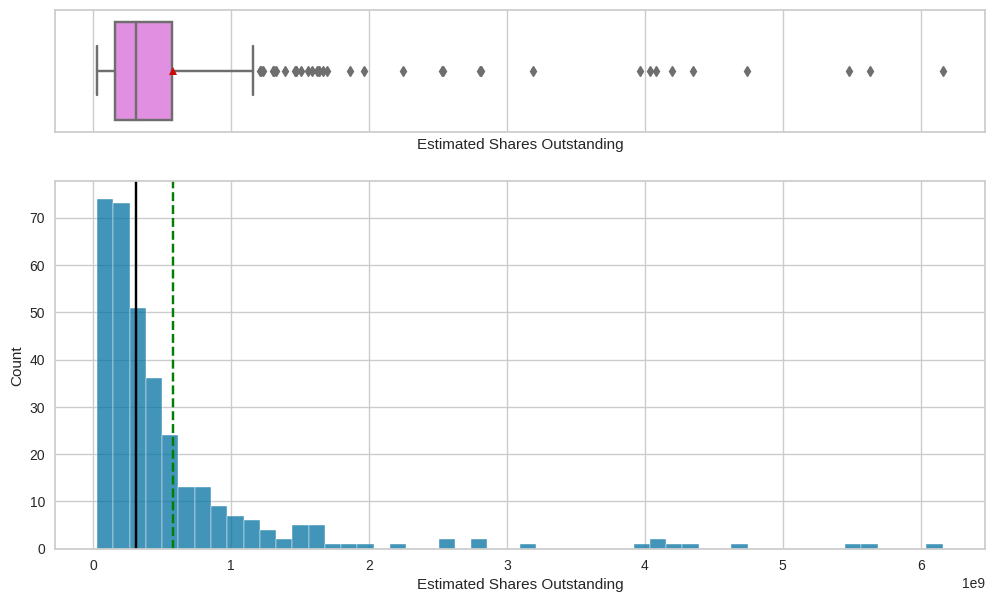

In [ ]:
histogram_boxplot(trade1, "Estimated Shares Outstanding")

* right skewed
* outliers present
* majority of values are .02(1e9) to 1.75(1e9)
* median is around .5 and mean arounf .75

**P/E Ratio**

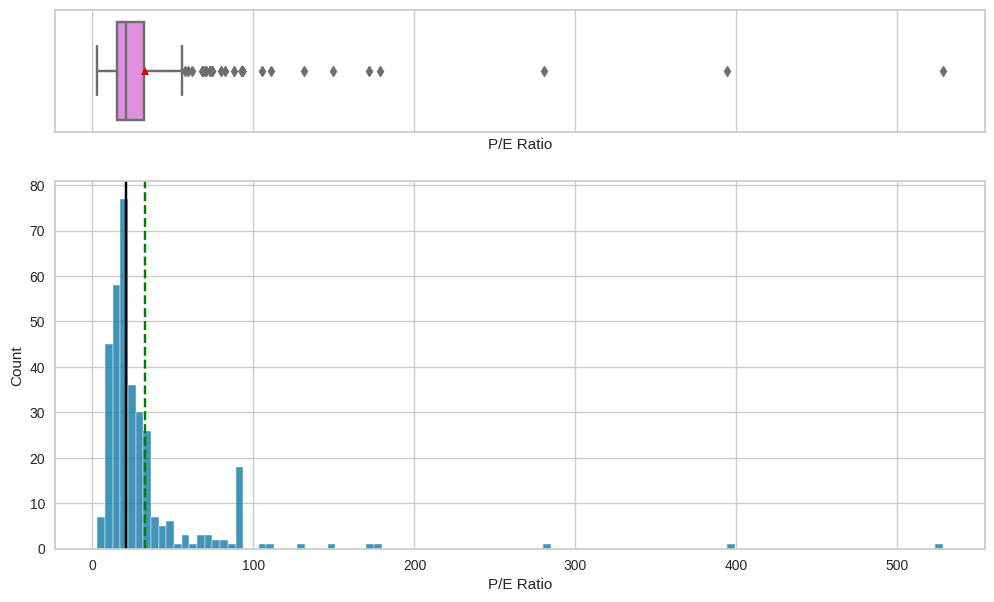

In [ ]:
histogram_boxplot(trade1, "P/E Ratio")

* right skewed
* values range between 10 -550
* majority of values are between 10-50
* median is around 40 mean around 60

**P/B Ratio**

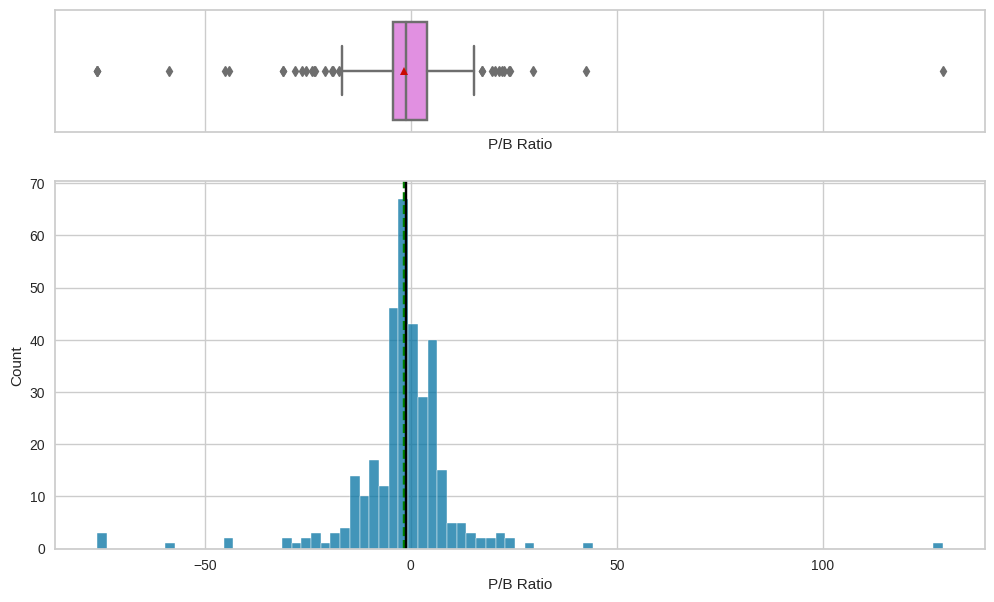

In [ ]:
histogram_boxplot(trade1, "P/B Ratio")

* normal distribution
* values range between -75 between 150
* majority of values are between -25 between 25
* median and mean are around 0

In [ ]:
# function to create labaled barplots

def labeled_barplot(trade1, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe colums
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(trade1[feature]) # lenght of the column
    count = trade1[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figsize(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=trade1,
        x=feature,
        palette="Paired",
        order=trade1[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) # percentage of each class of the category
        else:
            label = p.get_height() # count of each level of the category

        x = p.get_x() + p.get_width() / 2 # width of the plot
        y = p.get_height() # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=15,
            xytext=(0,5),
            textcoords="offset points",
        )   # annotate the percentage

    plt.show() #show the plot

**GICS Sector**

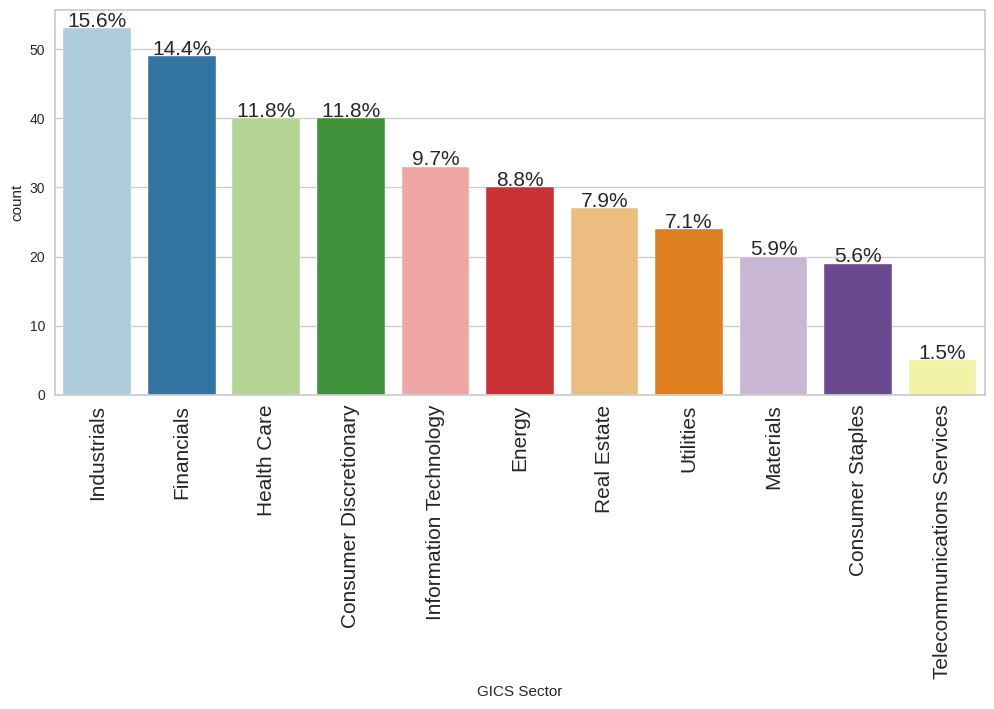

In [ ]:
labeled_barplot(trade1, 'GICS Sector', perc=True)

* Industries and Financials are the highest
* Health Care and Consumer Discretionary are second

**GICS Sub Industry**

2. The stocks of which economic sector have seen the maximum price increase on average?

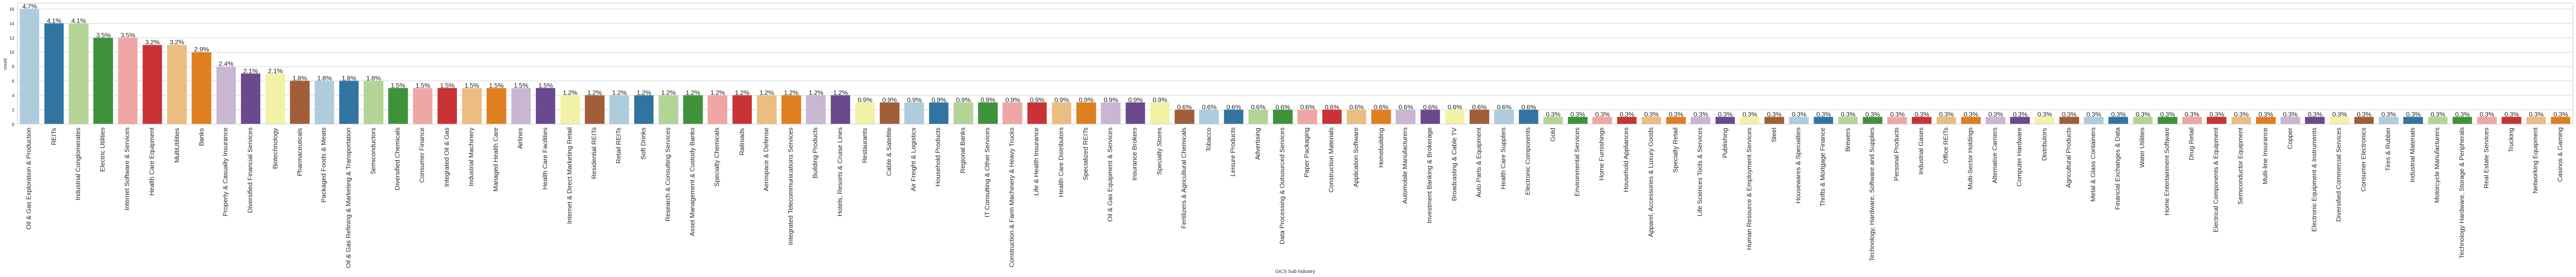

In [ ]:
labeled_barplot(trade1, "GICS Sub Industry", perc=True)

* Oil & Gas Exploration & Production is 1st
* REITS & Industrial Conglomerates in 2nd
* Eletric Utilities and Internet Software & Services in 3rd
* Healthcare Equipment, Multi Utlities, and Banks are 4th

### Bivariate Analysis

**3. How are the different variables correlated with each other?**

<Axes: >

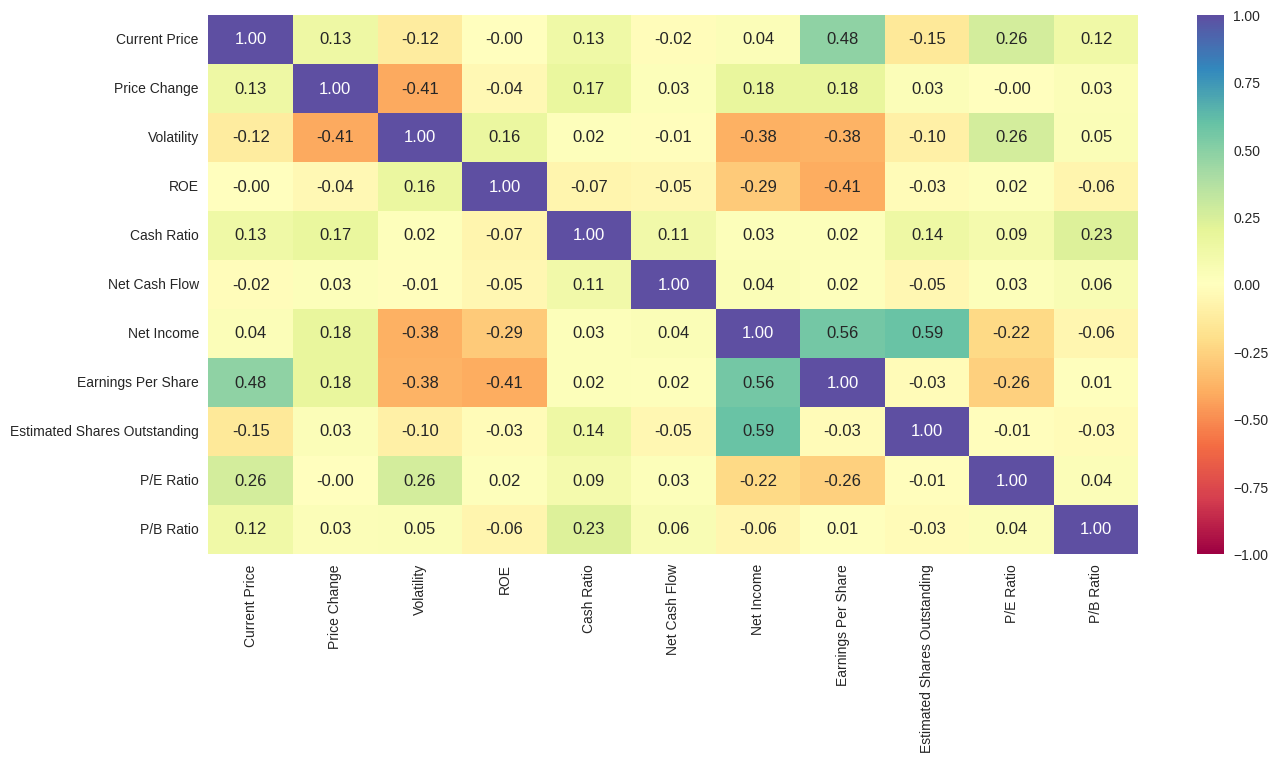

In [ ]:
# correlation check
plt.figure(figsize=(15,7))
sns.heatmap(
    trade1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

* Net income and Earnings per share are moderatly correlated at .59
* Estimated Shares Outstanding & Net Income are moderately correlated at .59
* There are zero variables that are highly correlated


**2. The stocks of which economic sector have seen the maximum price increase on average?**

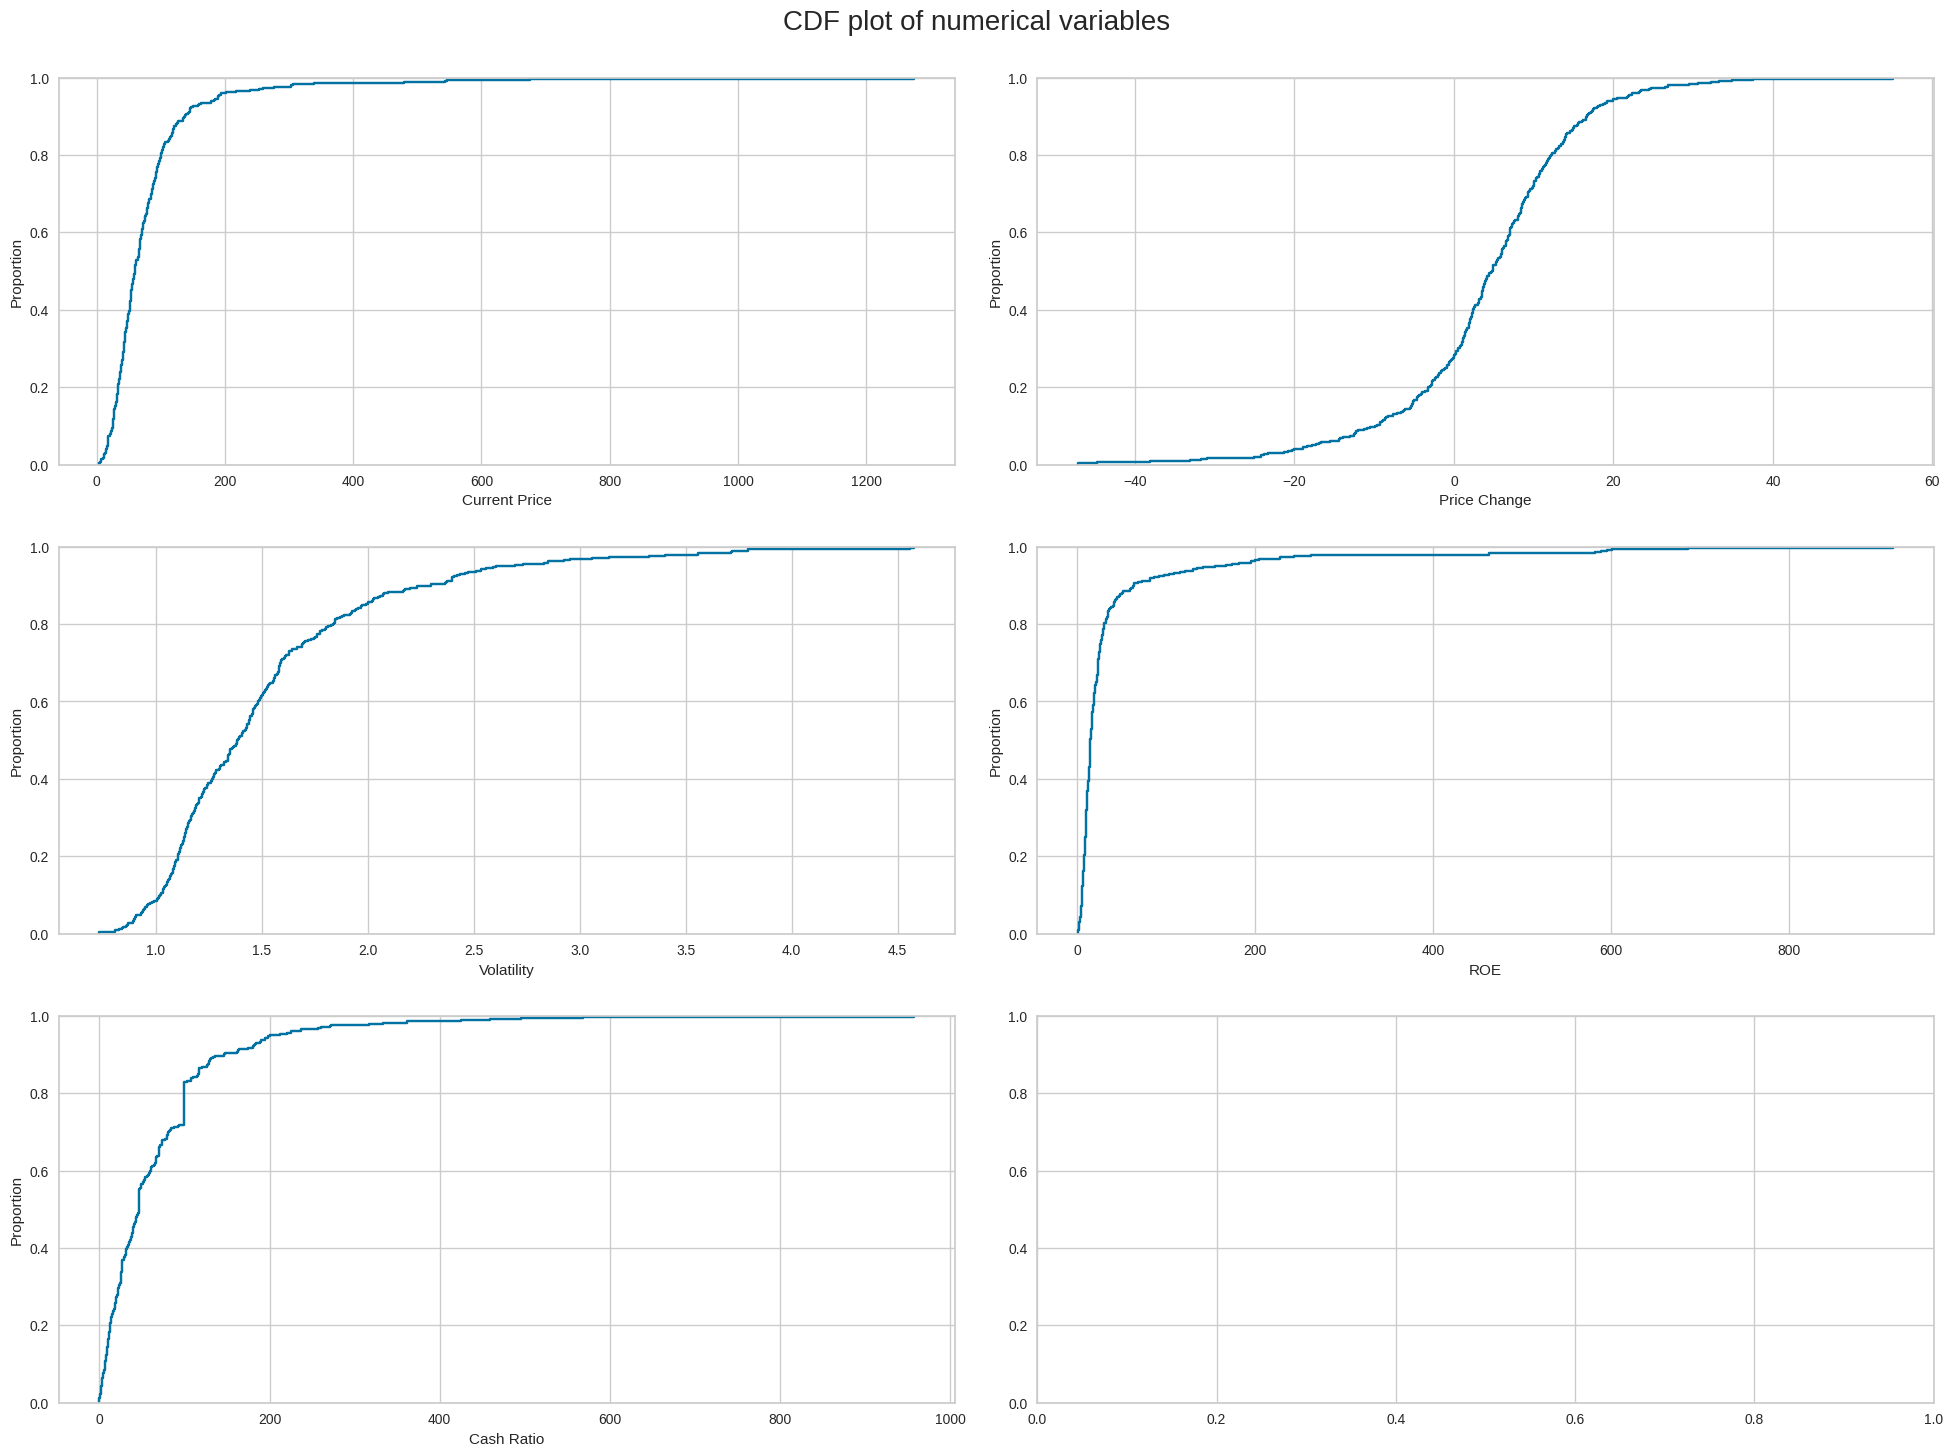

In [ ]:
numeric_columns = trade1.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=trade1[numeric_columns[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=trade1[numeric_columns[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**

* 90% Cash Ratio is 200 or less across sectors
* 90% Volatility is 2.5 or less across sectors
* 90% ROE is 1 or less across sectors
* 80% Price Change is 10 or less across sectors
* 90% Current Price is 200 or less across sectors

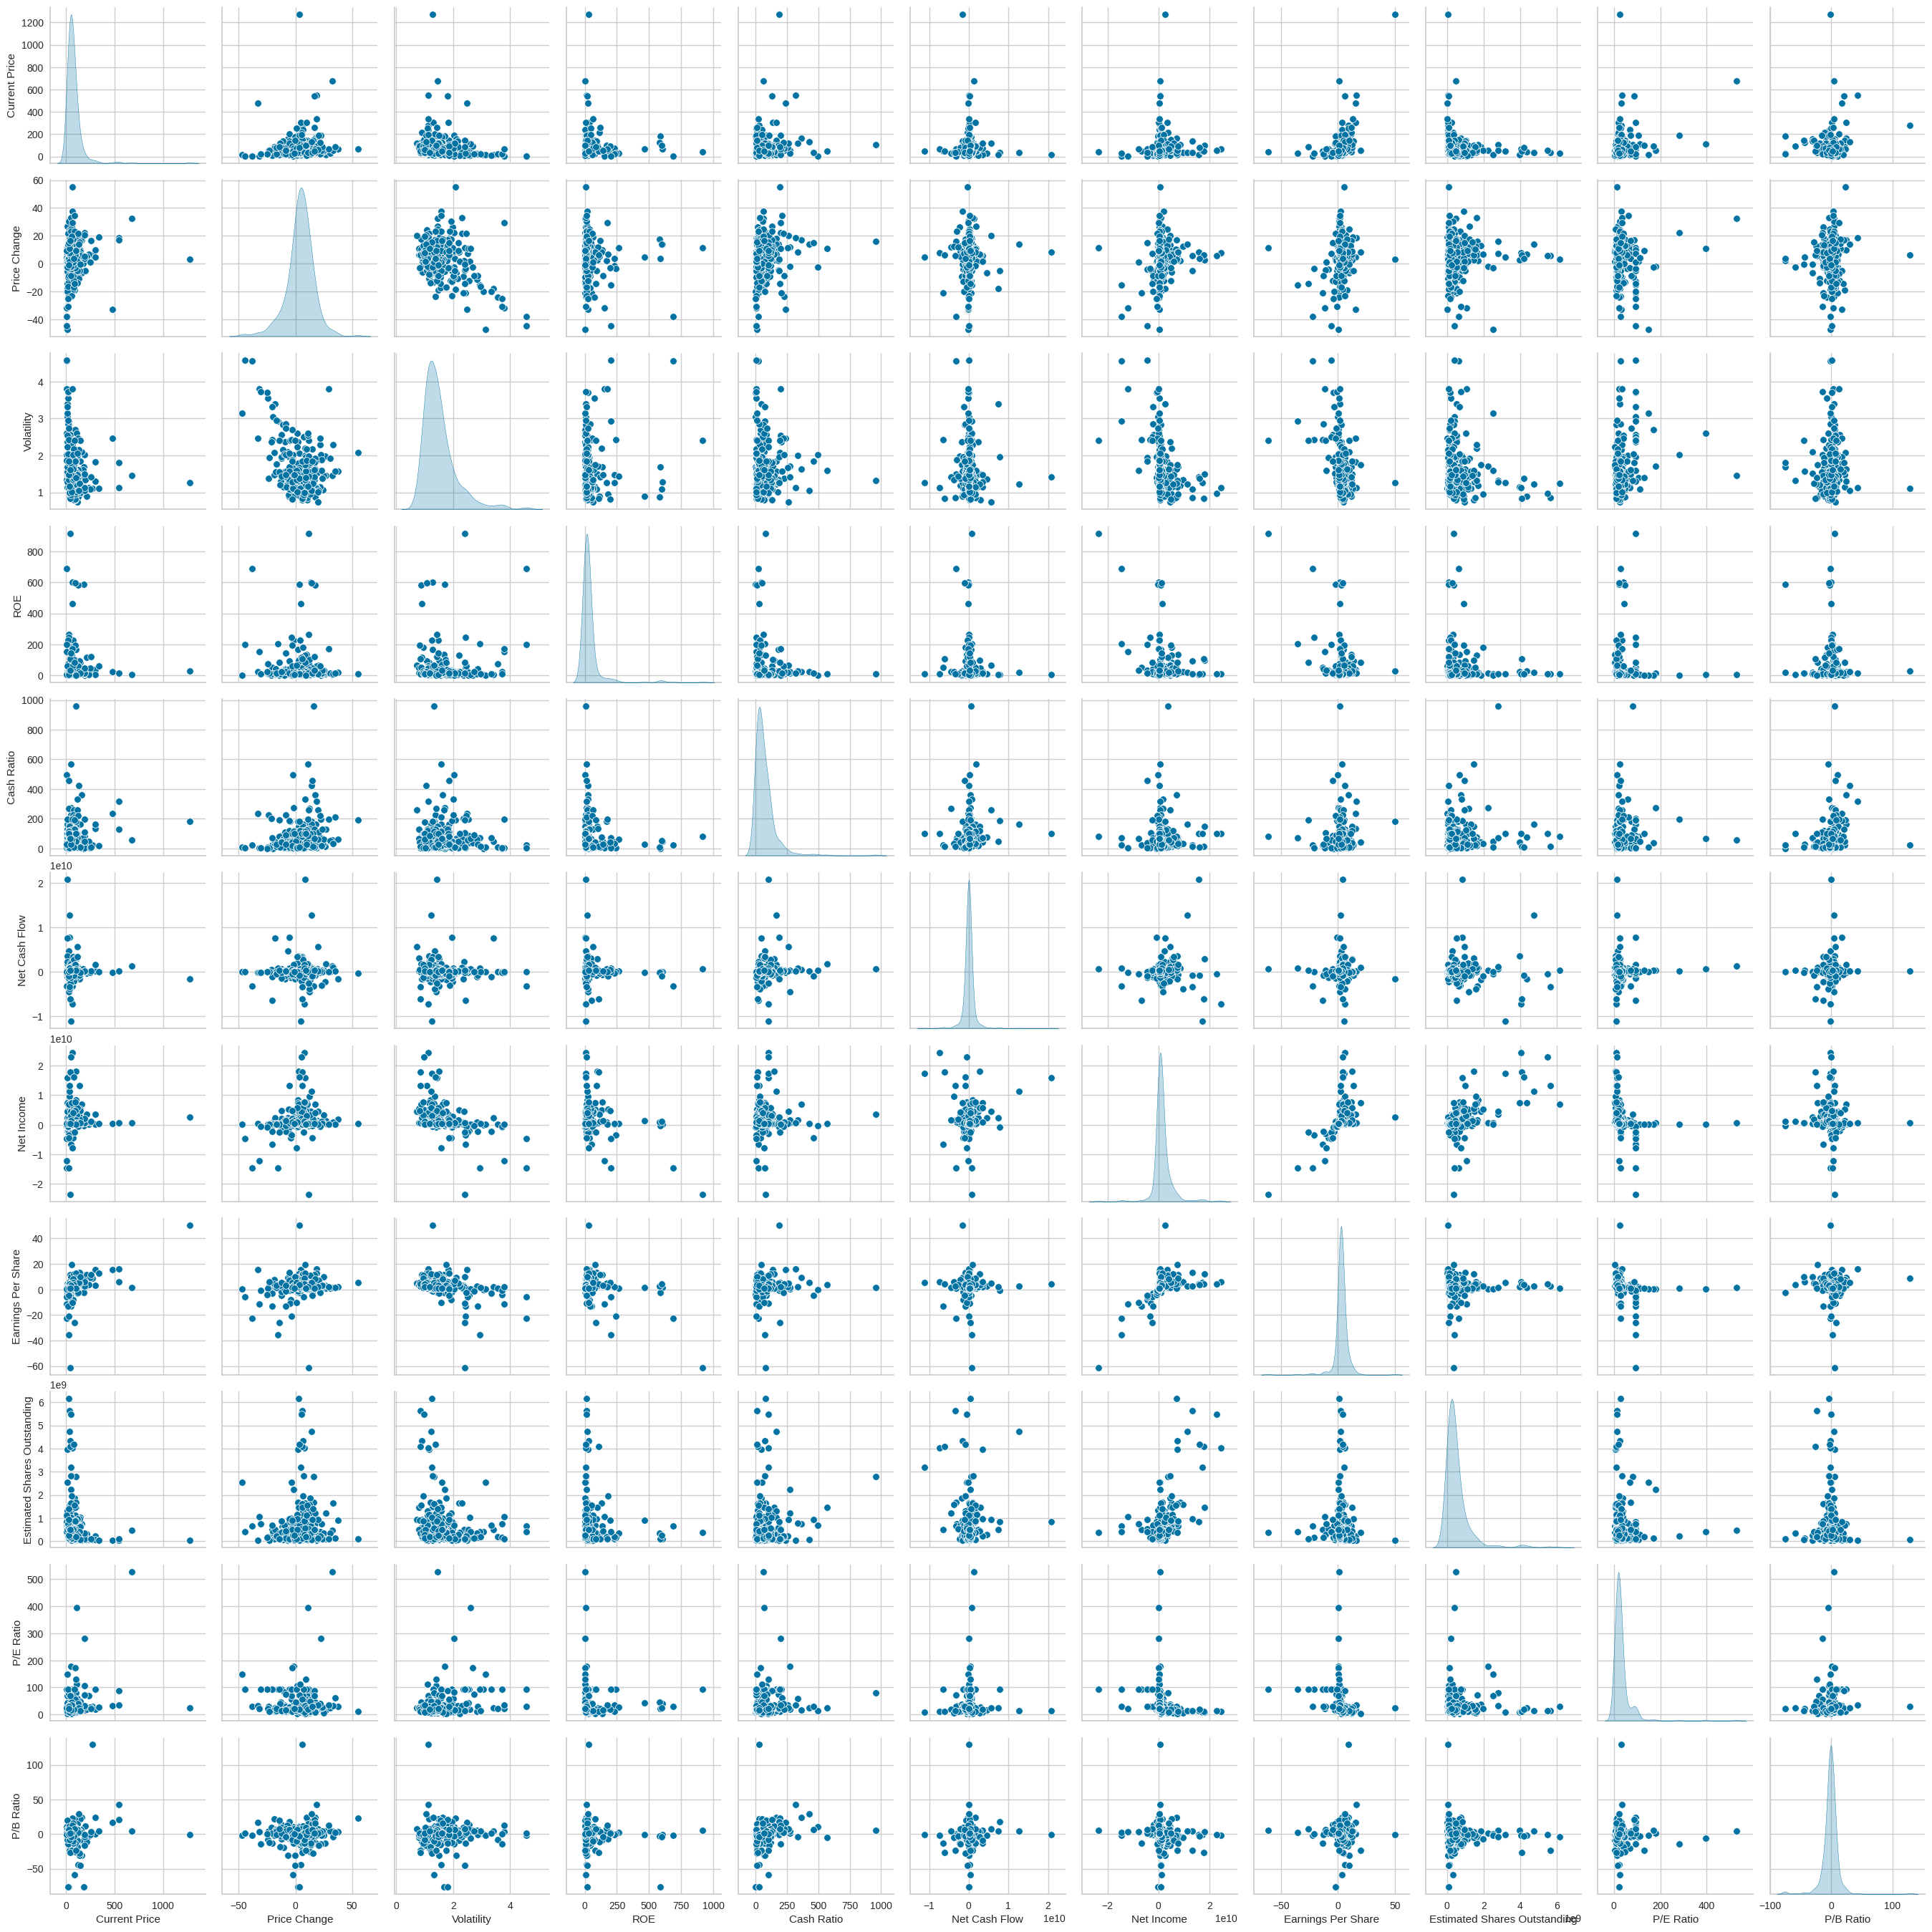

In [ ]:
sns.pairplot(data=trade1[numeric_columns], diag_kind="kde")
plt.show()

* max amount of peaks is around 2 with an almost not noticable peak.
* price change & earning per share is +/- 50 these two values probably correlate with each other
* volality is mostly contained around 3.40 with outliers
* cash ratio is mostly contained around 250

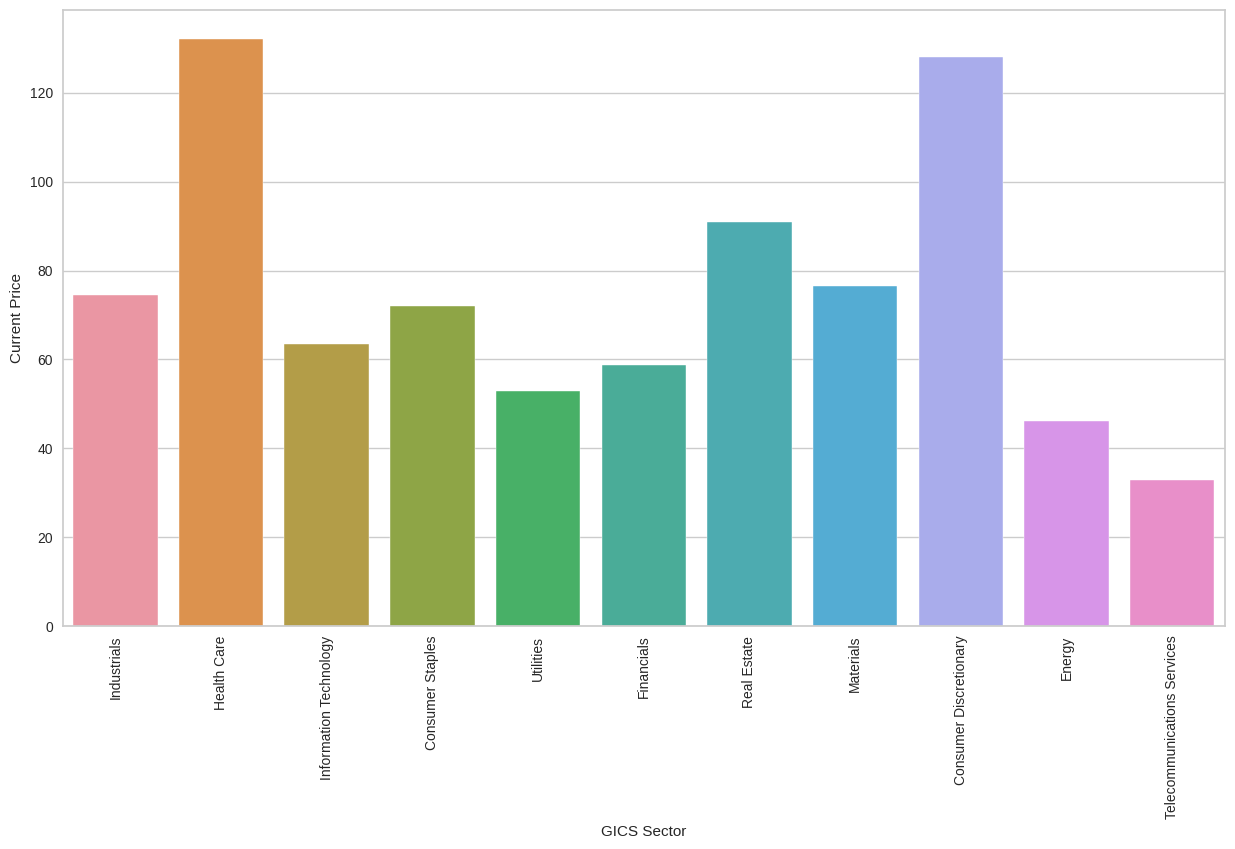

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=trade1, x='GICS Sector', y='Current Price', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

* Stocks in the Healthcare and Consumer Discretionary have the highest price increase on average

**4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**


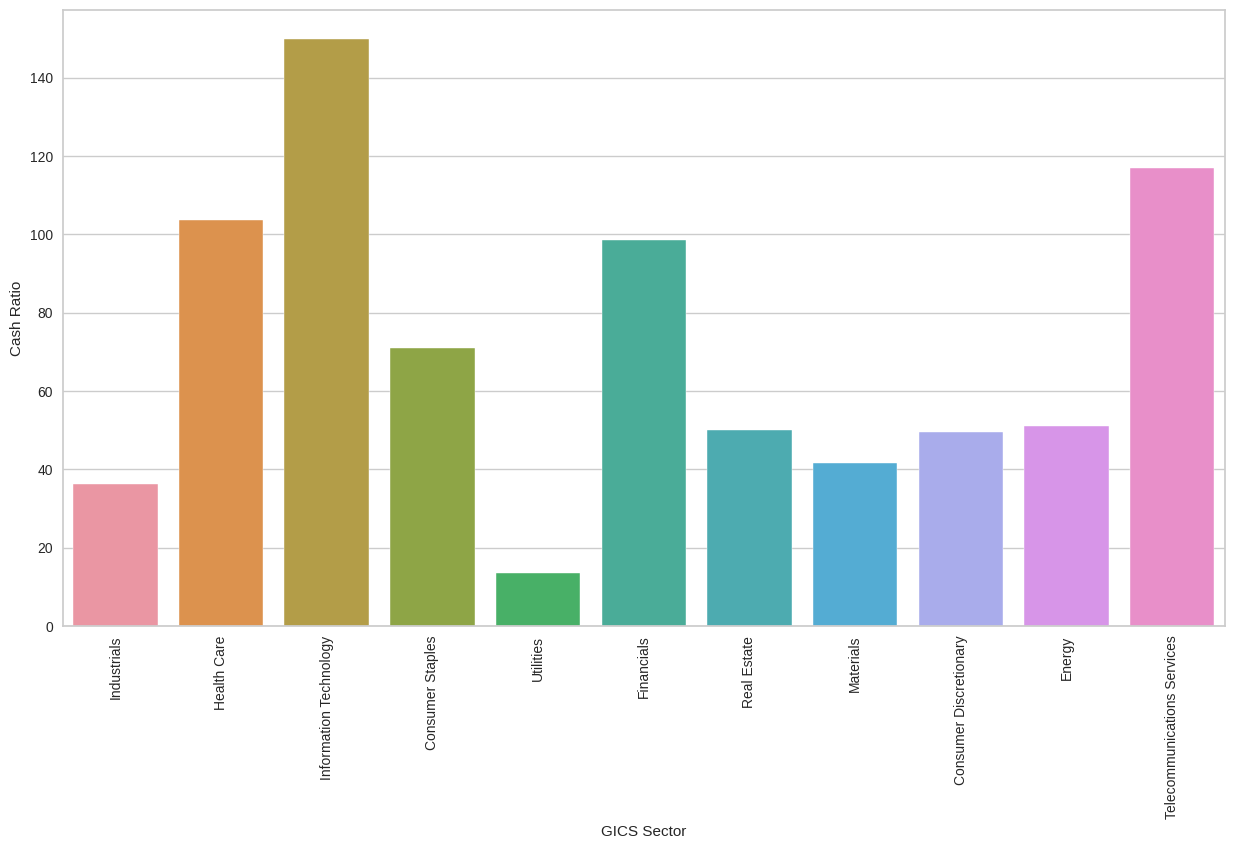

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=trade1, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

* The range is ~ 15 to 150 across the sectors
* Information Technology is the highest arcoss the sectors around 150
* Telecommunications Services is second around 118
* Healthcare (105) and Financials slightly under (100)
* Cosumer Staples is around (75)
* Real Estate, Materials, Consumer Discretionary, Industries, & Energy hover around (38 - 45)
* Utilities is the lowest at ~ approx 15

**5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

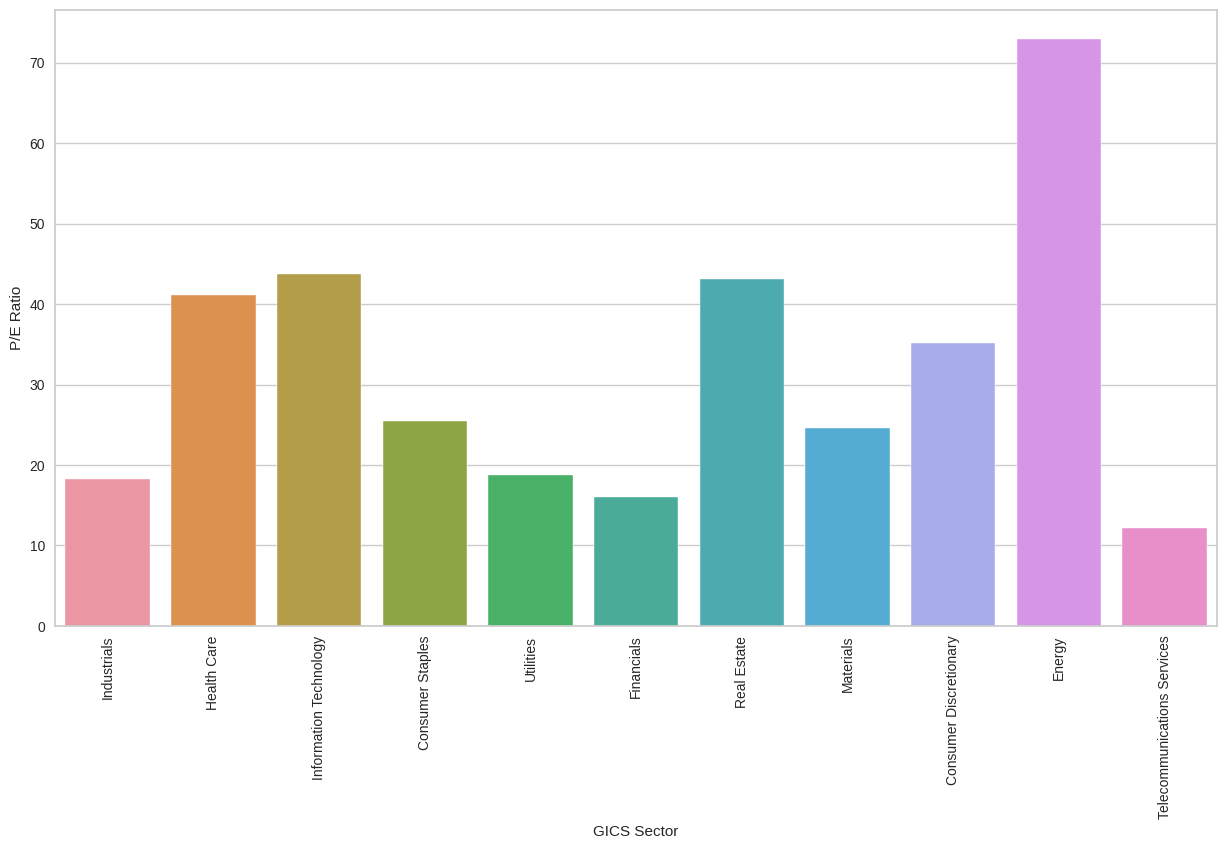

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=trade1, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

* The range is ~ 12 to 72 across the sectors
* Energy is the highest arcoss the sectors around 72
* Healthcare, IT, Real Estate, and Consumer Discretionary is second ranging ~ approx (38-42)
* Materials and Consumer Staples is around (24)
* Cosumer Staples is around (75)
* Industries, Utilities, and Financials hover around (17-18)
* Telecommunications is around (12)

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

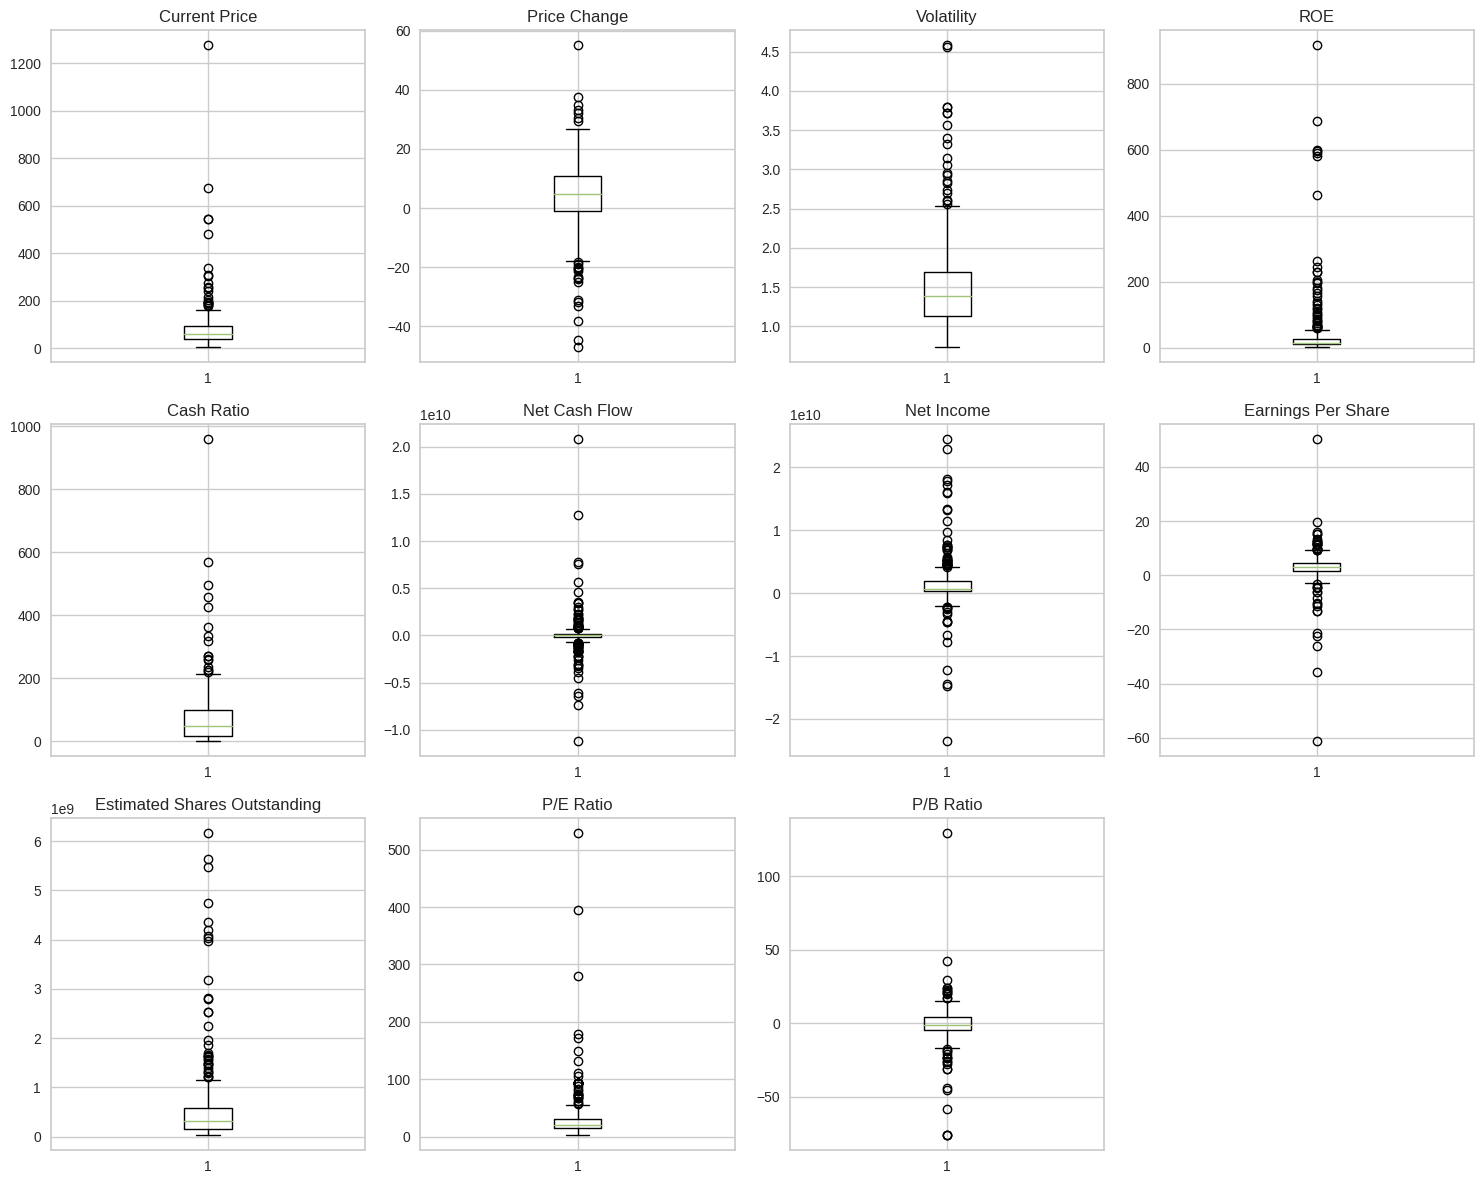

In [ ]:
plt.figure(figsize=(15, 12))

#numeric_columns = trade1.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(trade1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

Let's scale the data before we proceed with clustering.

In [ ]:
# variables used for clustering
numeric_columns

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = trade1[numeric_columns].copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled columns
subset_scaled_trade1 = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.384499097487295
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.1268026368498707
Number of Clusters: 6 	Average Distortion: 2.0585924055596587
Number of Clusters: 7 	Average Distortion: 2.045046571436353
Number of Clusters: 8 	Average Distortion: 1.9697396718542999


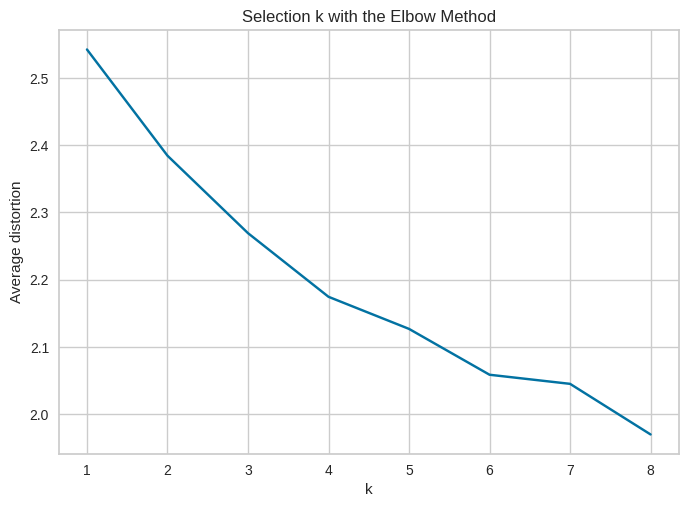

In [ ]:
clusters = range(1,9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_trade1)
    prediction = model.predict(subset_scaled_trade1)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_trade1, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_trade1.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selection k with the Elbow Method")
plt.show()

**Appropriate value for k seems to be 4.**

#### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.4484662124740991)
For n_clusters = 3, the silhouette score is 0.45494915445064904)
For n_clusters = 4, the silhouette score is 0.4579748748825155)
For n_clusters = 5, the silhouette score is 0.41024201776981023)
For n_clusters = 6, the silhouette score is 0.41439237473055257)
For n_clusters = 7, the silhouette score is 0.41665283542427983)
For n_clusters = 8, the silhouette score is 0.3964506930363928)
For n_clusters = 9, the silhouette score is 0.3019486464977648)


<function matplotlib.pyplot.show(close=None, block=None)>

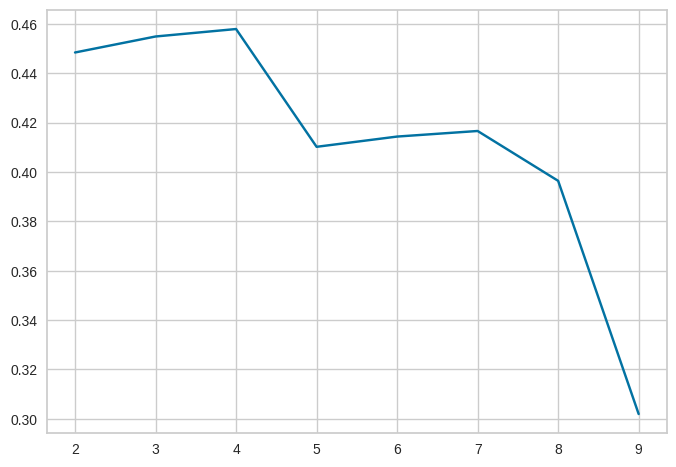

In [ ]:
from yellowbrick.contrib.wrapper import clusterer
sil_score = []
cluster_list  = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds  = clusterer.fit_predict((subset_scaled_trade1))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_trade1, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters,score))

plt.plot(cluster_list, sil_score)
plt.show

**Silhouette score for 3 is slightly higher than that for 4. So, we will choose 3 as value of k.**

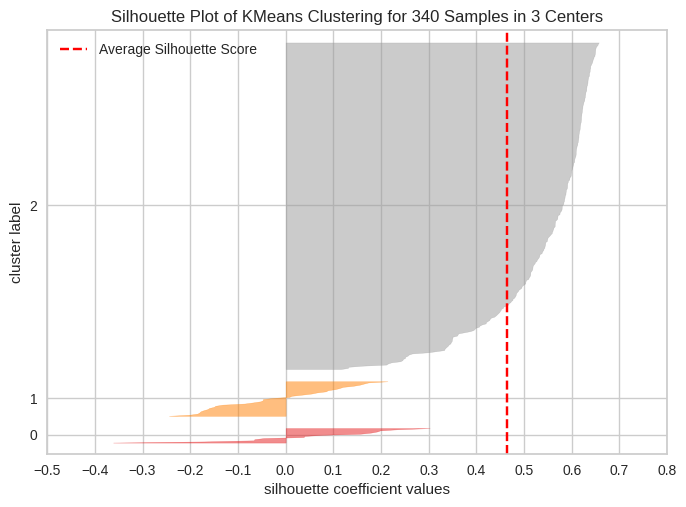

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_trade1)
visualizer.show()

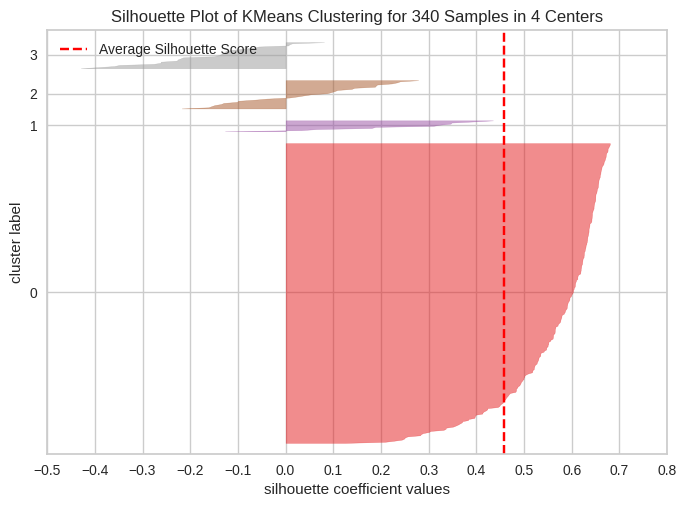

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_trade1)
visualizer.show()

In [ ]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_trade1)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes

trade1["K_means_segments"] = kmeans.labels_
subset_scaled_trade1["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [ ]:
cluster_profile = trade1.groupby("K_means_segments").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    trade1.groupby("K_means_segments")["Current Price"].count().values
)

In [ ]:
# let;s see the name of the GICS Sectors in each cluster
for cl in trade1["K_means_segments"].unique():
    print(
        "The",
        trade1[trade1["K_means_segments"] == cl]["GICS Sector"].nunique(),
        "GICS Sectors in cluster",
        cl,
        "are:",
    )
    print(trade1[trade1["K_means_segments"] == cl]["GICS Sector"].unique())
    print("-" * 100, "\n")

The 11 GICS Sectors in cluster 0 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']
---------------------------------------------------------------------------------------------------- 

The 6 GICS Sectors in cluster 2 are:
['Information Technology' 'Health Care' 'Consumer Discretionary' 'Energy'
 'Materials' 'Industrials']
---------------------------------------------------------------------------------------------------- 

The 7 GICS Sectors in cluster 1 are:
['Financials' 'Consumer Discretionary' 'Information Technology'
 'Health Care' 'Consumer Staples' 'Telecommunications Services' 'Energy']
---------------------------------------------------------------------------------------------------- 



In [ ]:
# let;s see the name of the GICS Sectors in each cluster
for cl in trade1["K_means_segments"].unique():
    print(
        "The",
        trade1[trade1["K_means_segments"] == cl]["GICS Sub Industry"].nunique(),
        "GICS Sub Industry in cluster",
        cl,
        "are:",
    )
    print(trade1[trade1["K_means_segments"] == cl]["GICS Sub Industry"].unique())
    print("-" * 100, "\n")

The 99 GICS Sub Industry in cluster 0 are:
['Airlines' 'Pharmaceuticals' 'Health Care Equipment'
 'Application Software' 'Agricultural Products'
 'Data Processing & Outsourced Services' 'MultiUtilities'
 'Electric Utilities' 'Life & Health Insurance'
 'Property & Casualty Insurance' 'REITs' 'Multi-line Insurance'
 'Insurance Brokers' 'Internet Software & Services' 'Specialty Chemicals'
 'Building Products' 'Semiconductor Equipment'
 'Electrical Components & Equipment' 'Asset Management & Custody Banks'
 'Biotechnology' 'Specialized REITs' 'Specialty Stores'
 'Managed Health Care' 'Electronic Components' 'Aerospace & Defense'
 'Home Entertainment Software' 'Residential REITs' 'Semiconductors'
 'Water Utilities' 'Consumer Finance' 'Banks' 'Metal & Glass Containers'
 'Health Care Distributors' 'Auto Parts & Equipment'
 'Construction & Farm Machinery & Heavy Trucks' 'Real Estate Services'
 'Hotels, Resorts & Cruise Lines' 'Fertilizers & Agricultural Chemicals'
 'Regional Banks' 'Household 

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

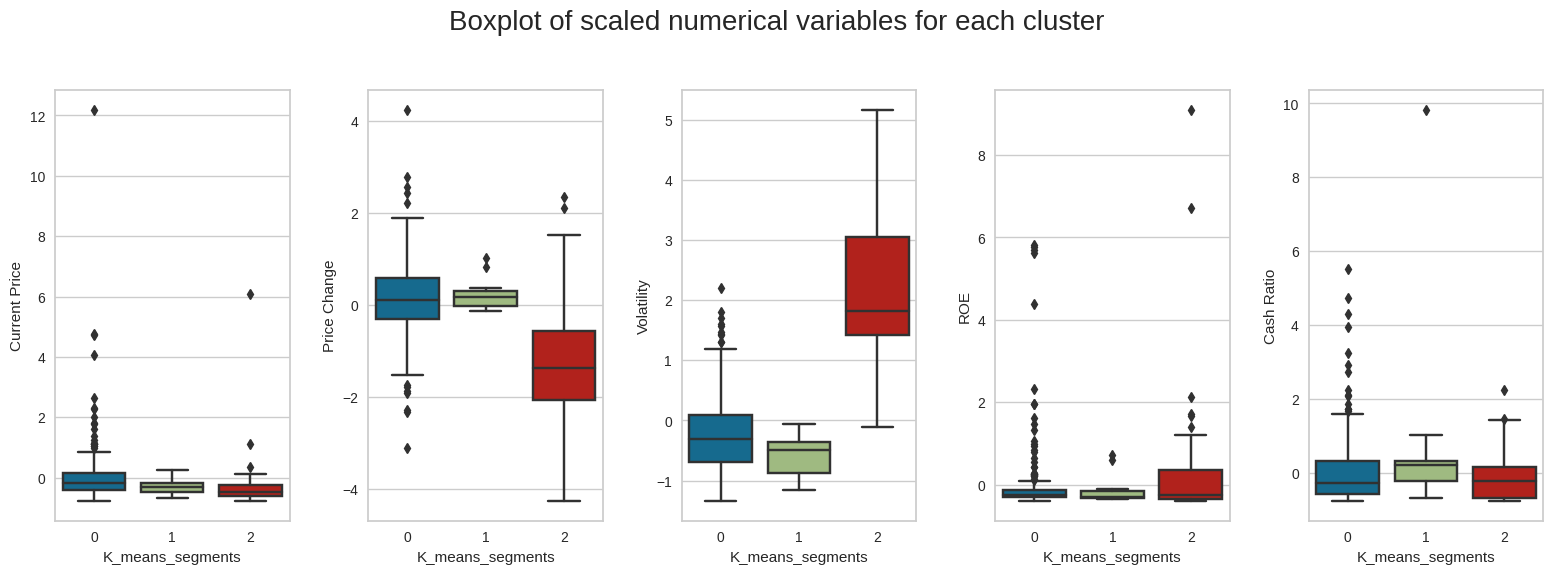

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_trade1[numeric_columns[counter]],
        x=subset_scaled_trade1["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

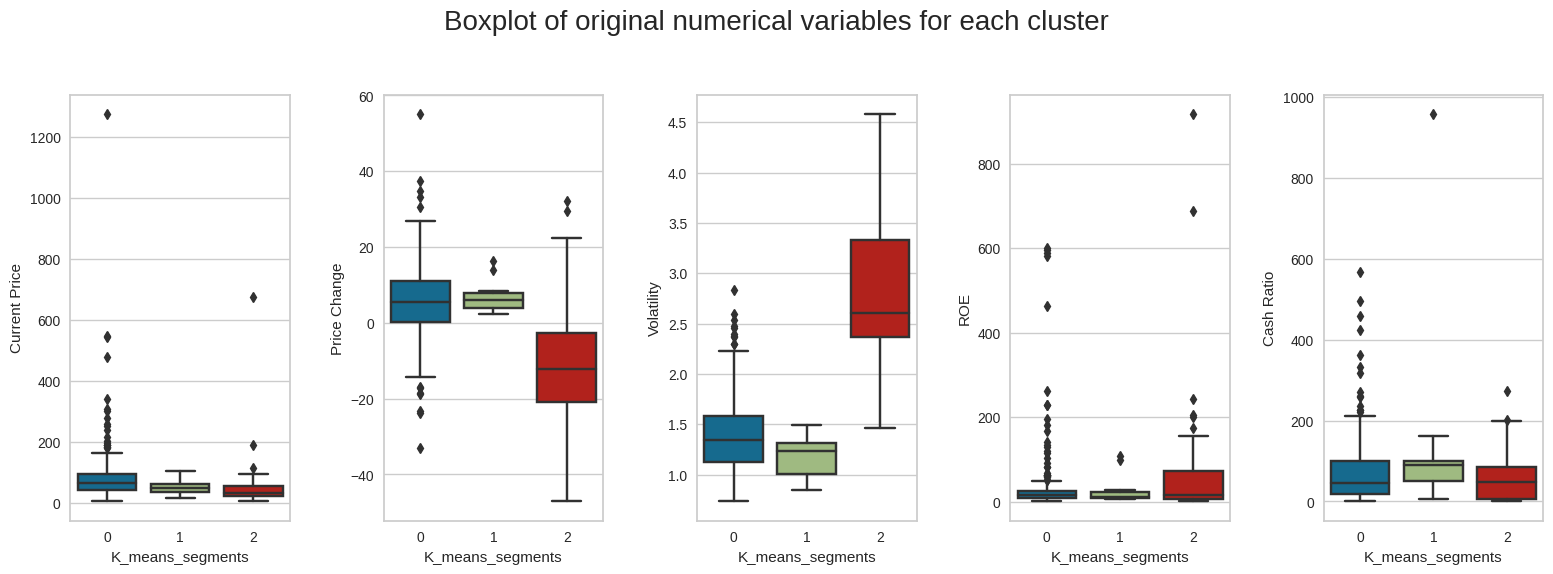

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=trade1[numeric_columns[counter]], x=trade1["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

We will look into clusters 0, 1, and 2.

- **Cluster 0**
   - There are 293 sectors in this cluster.
   - The P/B Ratio is a -2 which is not bad, better if was around one, but considering 293 sectors.
   - The P/E Ratio is around 24.4.
   - The current price, price change, volatility, ROE, Cash Ratio, Net Cash Flow, Net Income, Earnings Per Share are all positive.
   
   
- **Cluster 1**
   - There are 14 sectors in this cluster.
   - The P/B Ratio is a -3.5, analyst prefer around a one, but -3.5 isn’t too unreasonable.
   - The current price, price change, volatility, ROE, Cash Ratio, Net Income, Earnings Per Share are all positive.
   
- **Cluster 2**
   - There are 33 sectors in this cluster.
   - The Earning Per Share is a -7.63, and Net Income is negative 314 million, and Price Change also negative -10.5.
   - The current price, volatility, ROE, Cash Ratio are all positive.


## Hierarchical Clustering

### Checking Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_trade1, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_trade1))
        print(
            "Cophenetic correlation for {} distance and linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and linkage is single.
Cophenetic correlation for Euclidean distance and linkage is complete.
Cophenetic correlation for Euclidean distance and linkage is average.
Cophenetic correlation for Euclidean distance and linkage is weighted.
Cophenetic correlation for Chebyshev distance and linkage is single.
Cophenetic correlation for Chebyshev distance and linkage is complete.
Cophenetic correlation for Chebyshev distance and linkage is average.
Cophenetic correlation for Chebyshev distance and linkage is weighted.
Cophenetic correlation for Mahalanobis distance and linkage is single.
Cophenetic correlation for Mahalanobis distance and linkage is complete.
Cophenetic correlation for Mahalanobis distance and linkage is average.
Cophenetic correlation for Mahalanobis distance and linkage is weighted.
Cophenetic correlation for Cityblock distance and linkage is single.
Cophenetic correlation for Cityblock distance and linkage is complete.
Copheneti

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0], high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9507555560579792, which is obtained with euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_trade1, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_trade1))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9256256322762785.
Cophenetic correlation for complete linkage is 0.868928166968695.
Cophenetic correlation for average linkage is 0.9507555560579792.
Cophenetic correlation for centroid linkage is 0.9437005216488913.
Cophenetic correlation for ward linkage is 0.7069137712704721.
Cophenetic correlation for weighted linkage is 0.8783499263251745.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9507555560579792, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and centroid linkage.**

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods.**

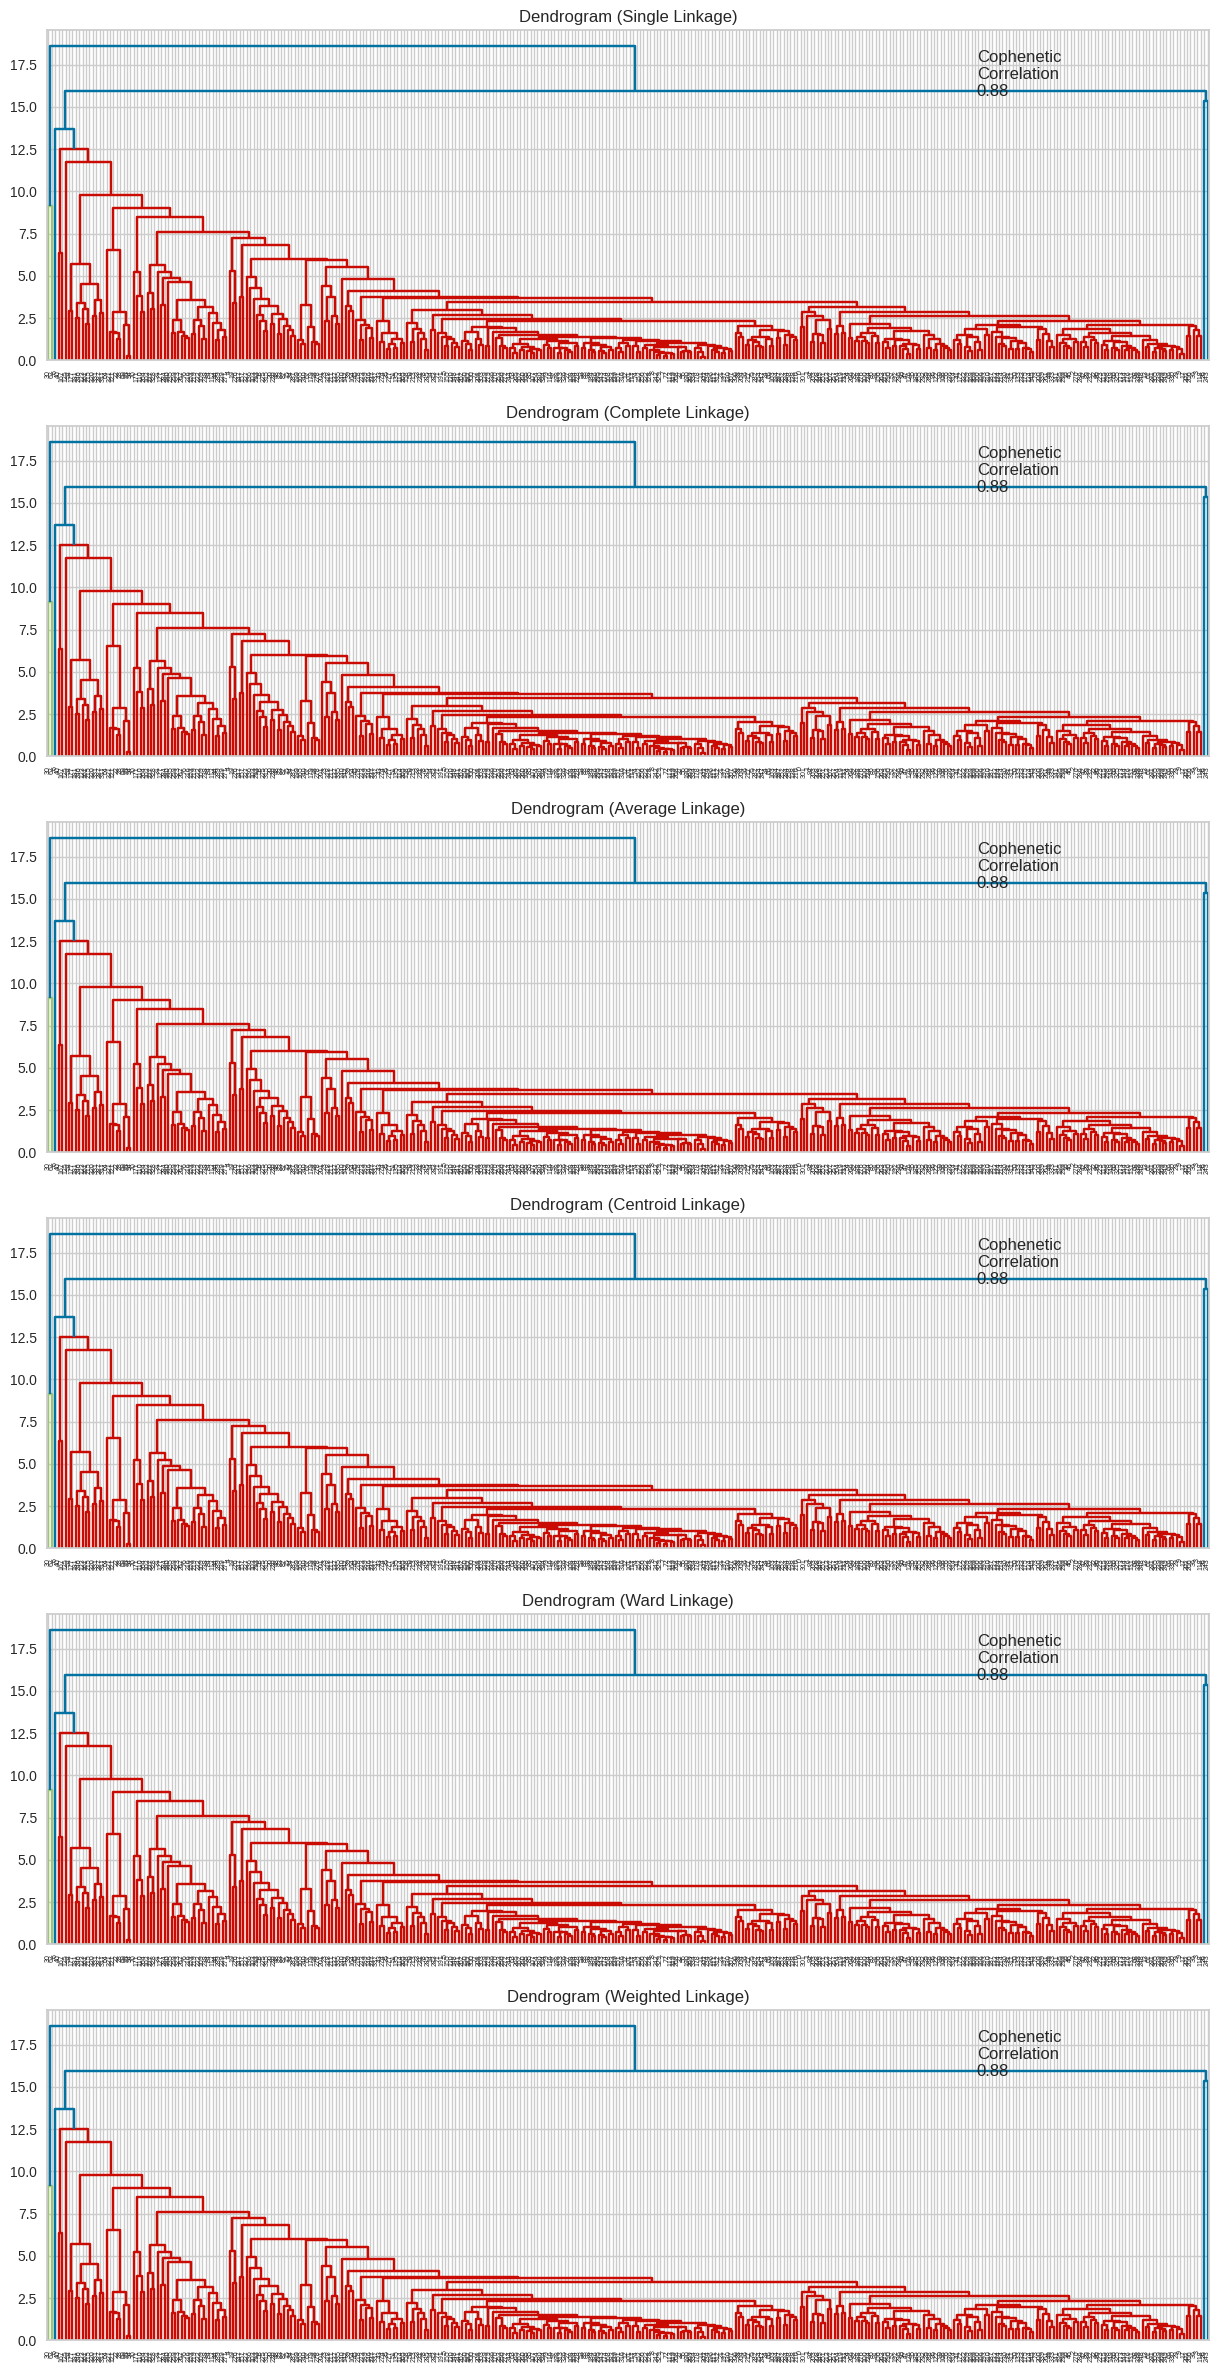

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophentic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z, linkage(subset_scaled_trade1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_trade1))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation for all linkages was 0.88.
- We will move ahead with average linkage.
- 9 appears to be the appropriate number of clusters from the dendrogram for average linkage.

###Creating Model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=10, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=10)

In [ ]:
subset_scaled_trade1["HC_Clusters"] = HCmodel.labels_
trade1["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
cluster_profile = trade1.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    trade1.groupby("HC_Clusters")["Current Price"].count().values
)

In [ ]:
# let's see the names of the countries in each cluster
for cl in trade1["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(trade1[trade1["HC_Clusters"] == cl]["GICS Sector"].unique())
    print()

In cluster 0, the following countries are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 5, the following countries are present:
['Information Technology']

In cluster 2, the following countries are present:
['Health Care' 'Information Technology']

In cluster 8, the following countries are present:
['Consumer Discretionary']

In cluster 7, the following countries are present:
['Energy']

In cluster 1, the following countries are present:
['Financials' 'Information Technology']

In cluster 4, the following countries are present:
['Financials' 'Consumer Discretionary' 'Consumer Staples' 'Health Care'
 'Telecommunications Services' 'Energy']

In cluster 6, the following countries are present:
['Energy']

In cluster 3, the following countries are present:
['Information Technology']

In cluster 9, the following countries are pr

**We see that there are 6 clusters of one GICS Sector, 2 clusters of two countries, 1 cluster with six GICS Sectors and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Complete linkage. 10 appears to be the appropriate number of clusters from the dendrogram for Complete linkage.**

### Creating Final HC Model

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=10, affinity="euclidean", linkage="complete")
HCmodel.fit(subset_scaled_trade1)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=10)

In [ ]:
subset_scaled_trade1["HC_Clusters"] = HCmodel.labels_
trade1["HC_Clusters"] = HCmodel.labels_

#### Cluster Profiling

In [ ]:
cluster_profile = trade1.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    trade1.groupby("HC_Clusters")['Current Price'].count().values
)

In [ ]:
# let;s see the name of the GICS Sectors in each cluster
for cl in trade1["HC_Clusters"].unique():
    print(
        "The",
        trade1[trade1["HC_Clusters"] == cl]["GICS Sector"].nunique(),
        "GICS Sectors in cluster",
        cl,
        "are:",
    )
    print(trade1[trade1["HC_Clusters"] == cl]["GICS Sector"].unique())
    print("-" * 100, "\n")

The 11 GICS Sectors in cluster 1 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']
---------------------------------------------------------------------------------------------------- 

The 1 GICS Sectors in cluster 6 are:
['Information Technology']
---------------------------------------------------------------------------------------------------- 

The 5 GICS Sectors in cluster 3 are:
['Industrials' 'Financials' 'Health Care' 'Consumer Discretionary'
 'Consumer Staples']
---------------------------------------------------------------------------------------------------- 

The 3 GICS Sectors in cluster 0 are:
['Health Care' 'Consumer Discretionary' 'Information Technology']
---------------------------------------------------------------------------------------------------- 

The 1 GICS Sectors in cluster 2 are:
['Energy']
-------------------

**We see that there are 4 clusters (#2,#6,#7,#8) of one GICS Sector, 1 cluster (#5) of two GICS Sectors, 1 cluster (#0) with three GICS Sectors, 1 cluster (#9) with four GICS Sectors, 1 cluster (#4) with six GICS Sectors and all GICS Sectors are grouped into cluster (#1). This clustering looks better and has variability.**

In [ ]:
#let's display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

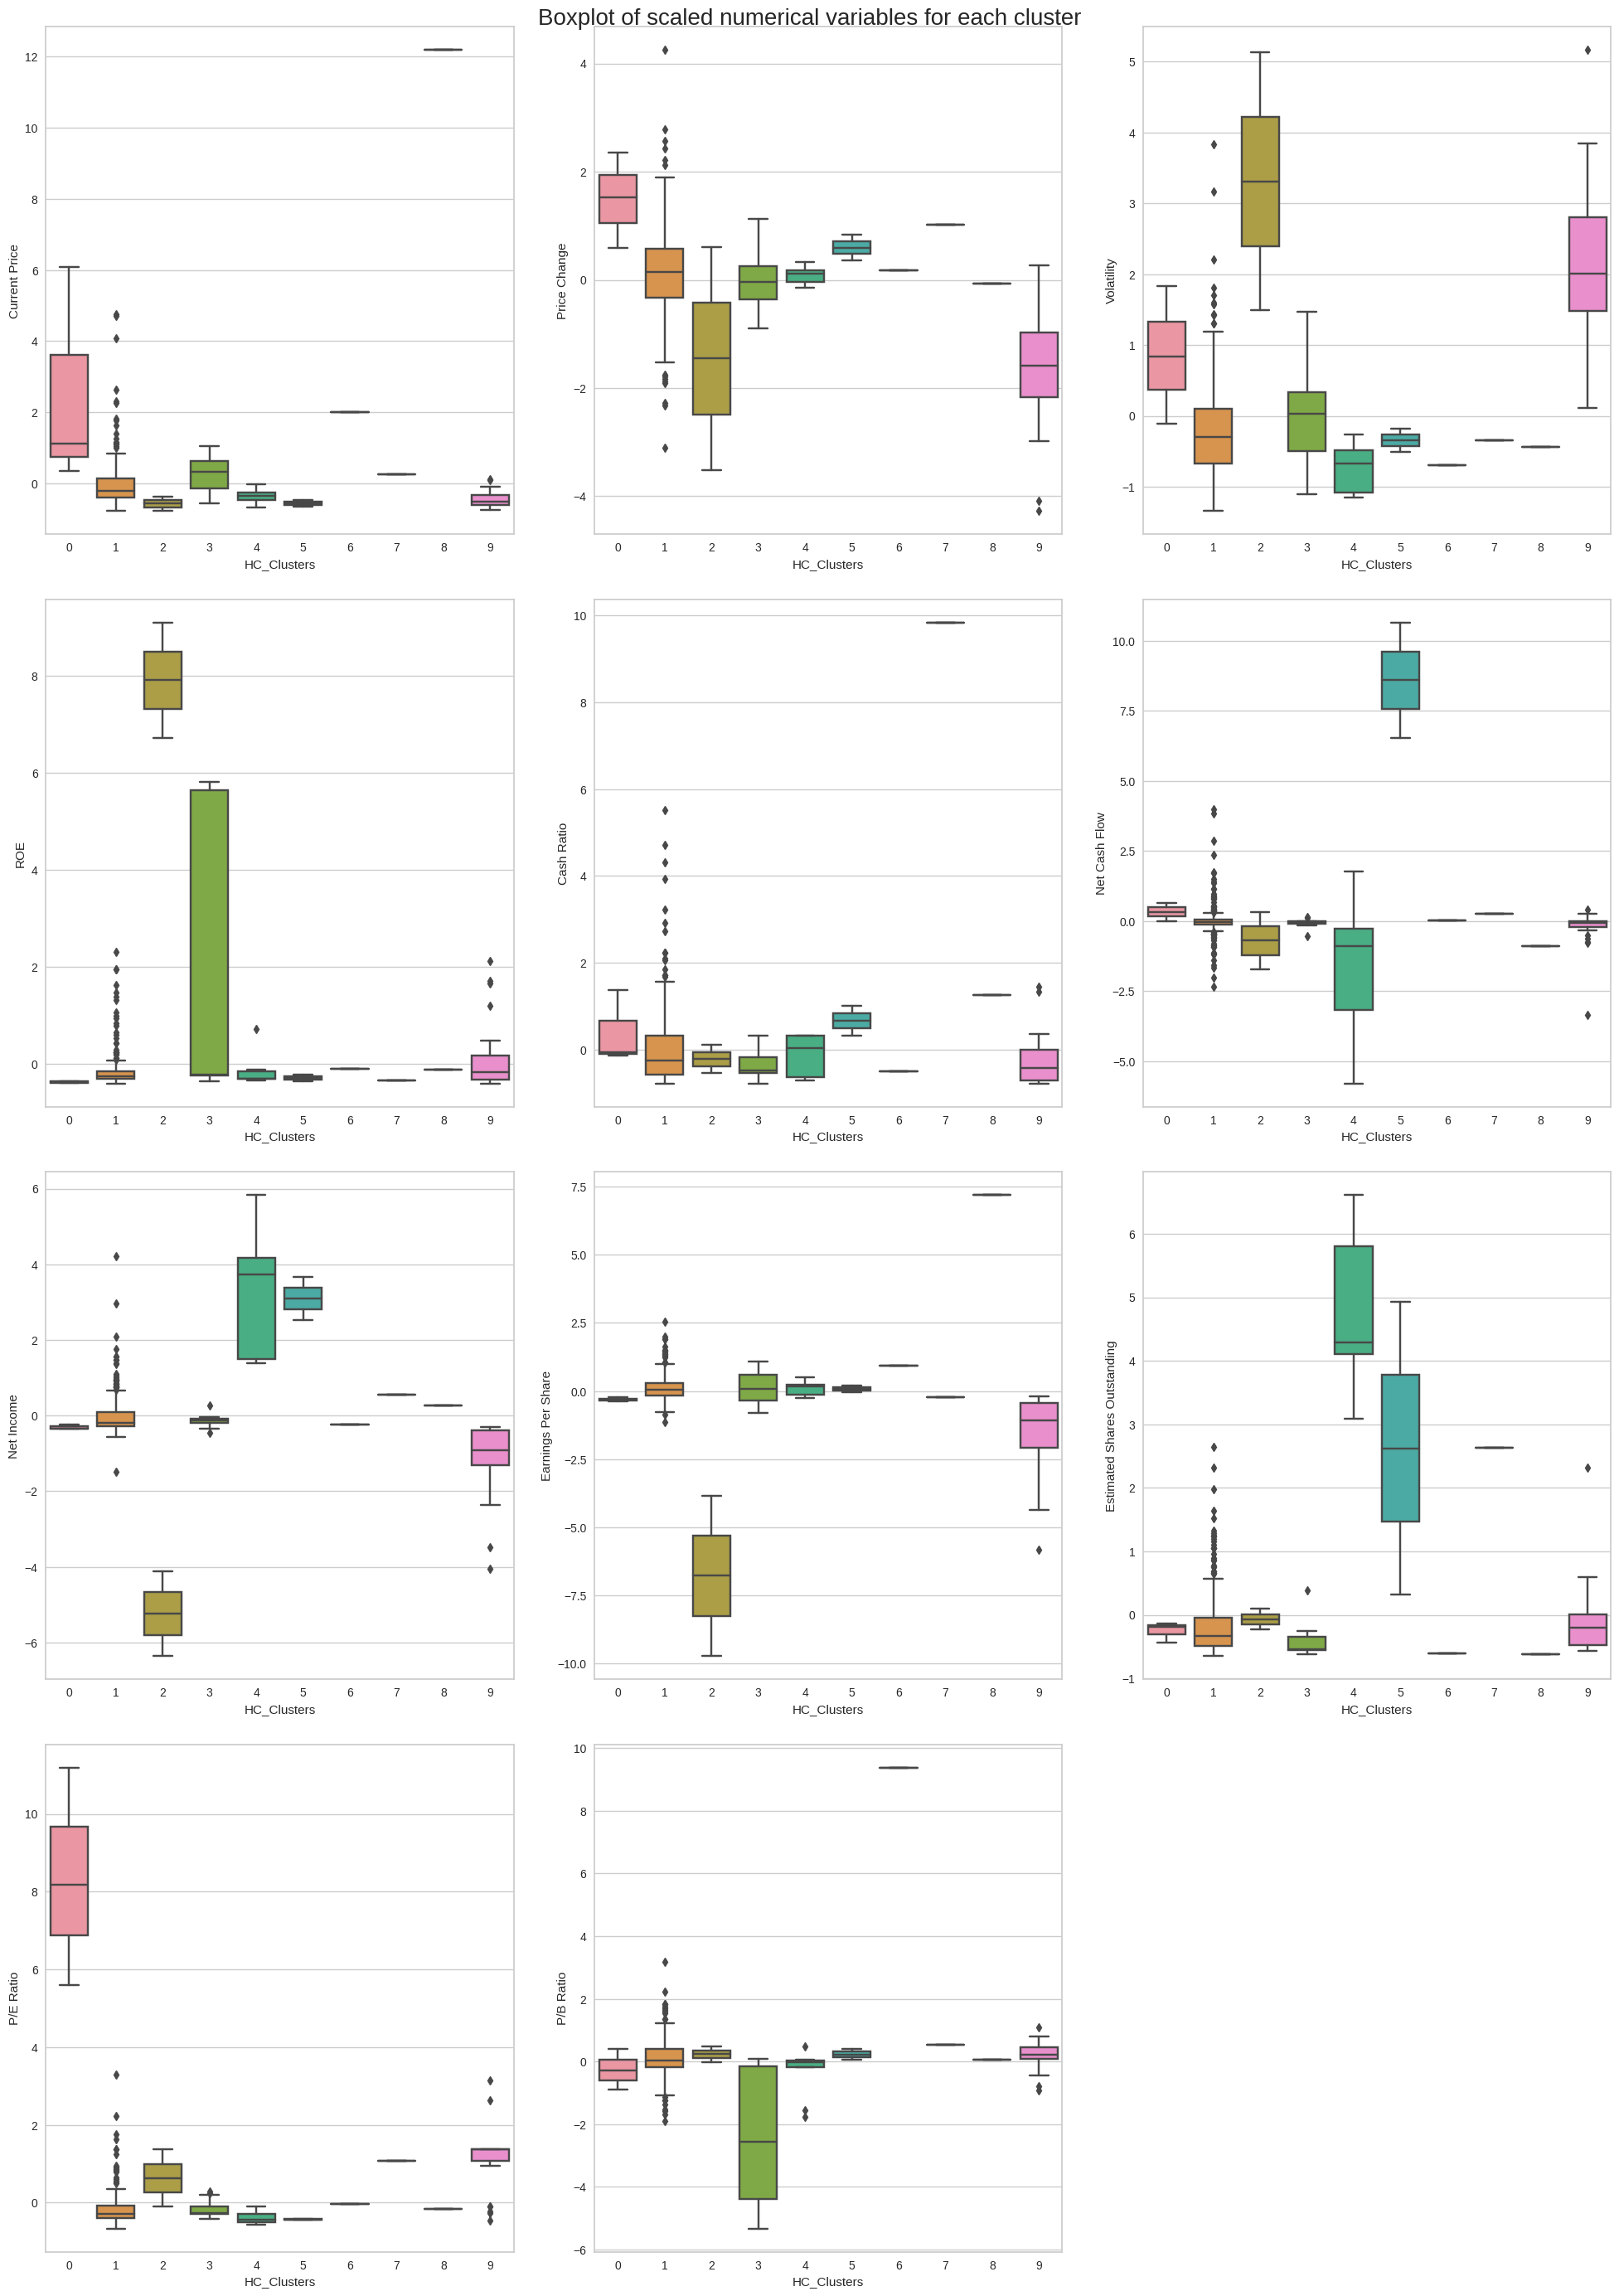

In [ ]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=subset_scaled_trade1, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

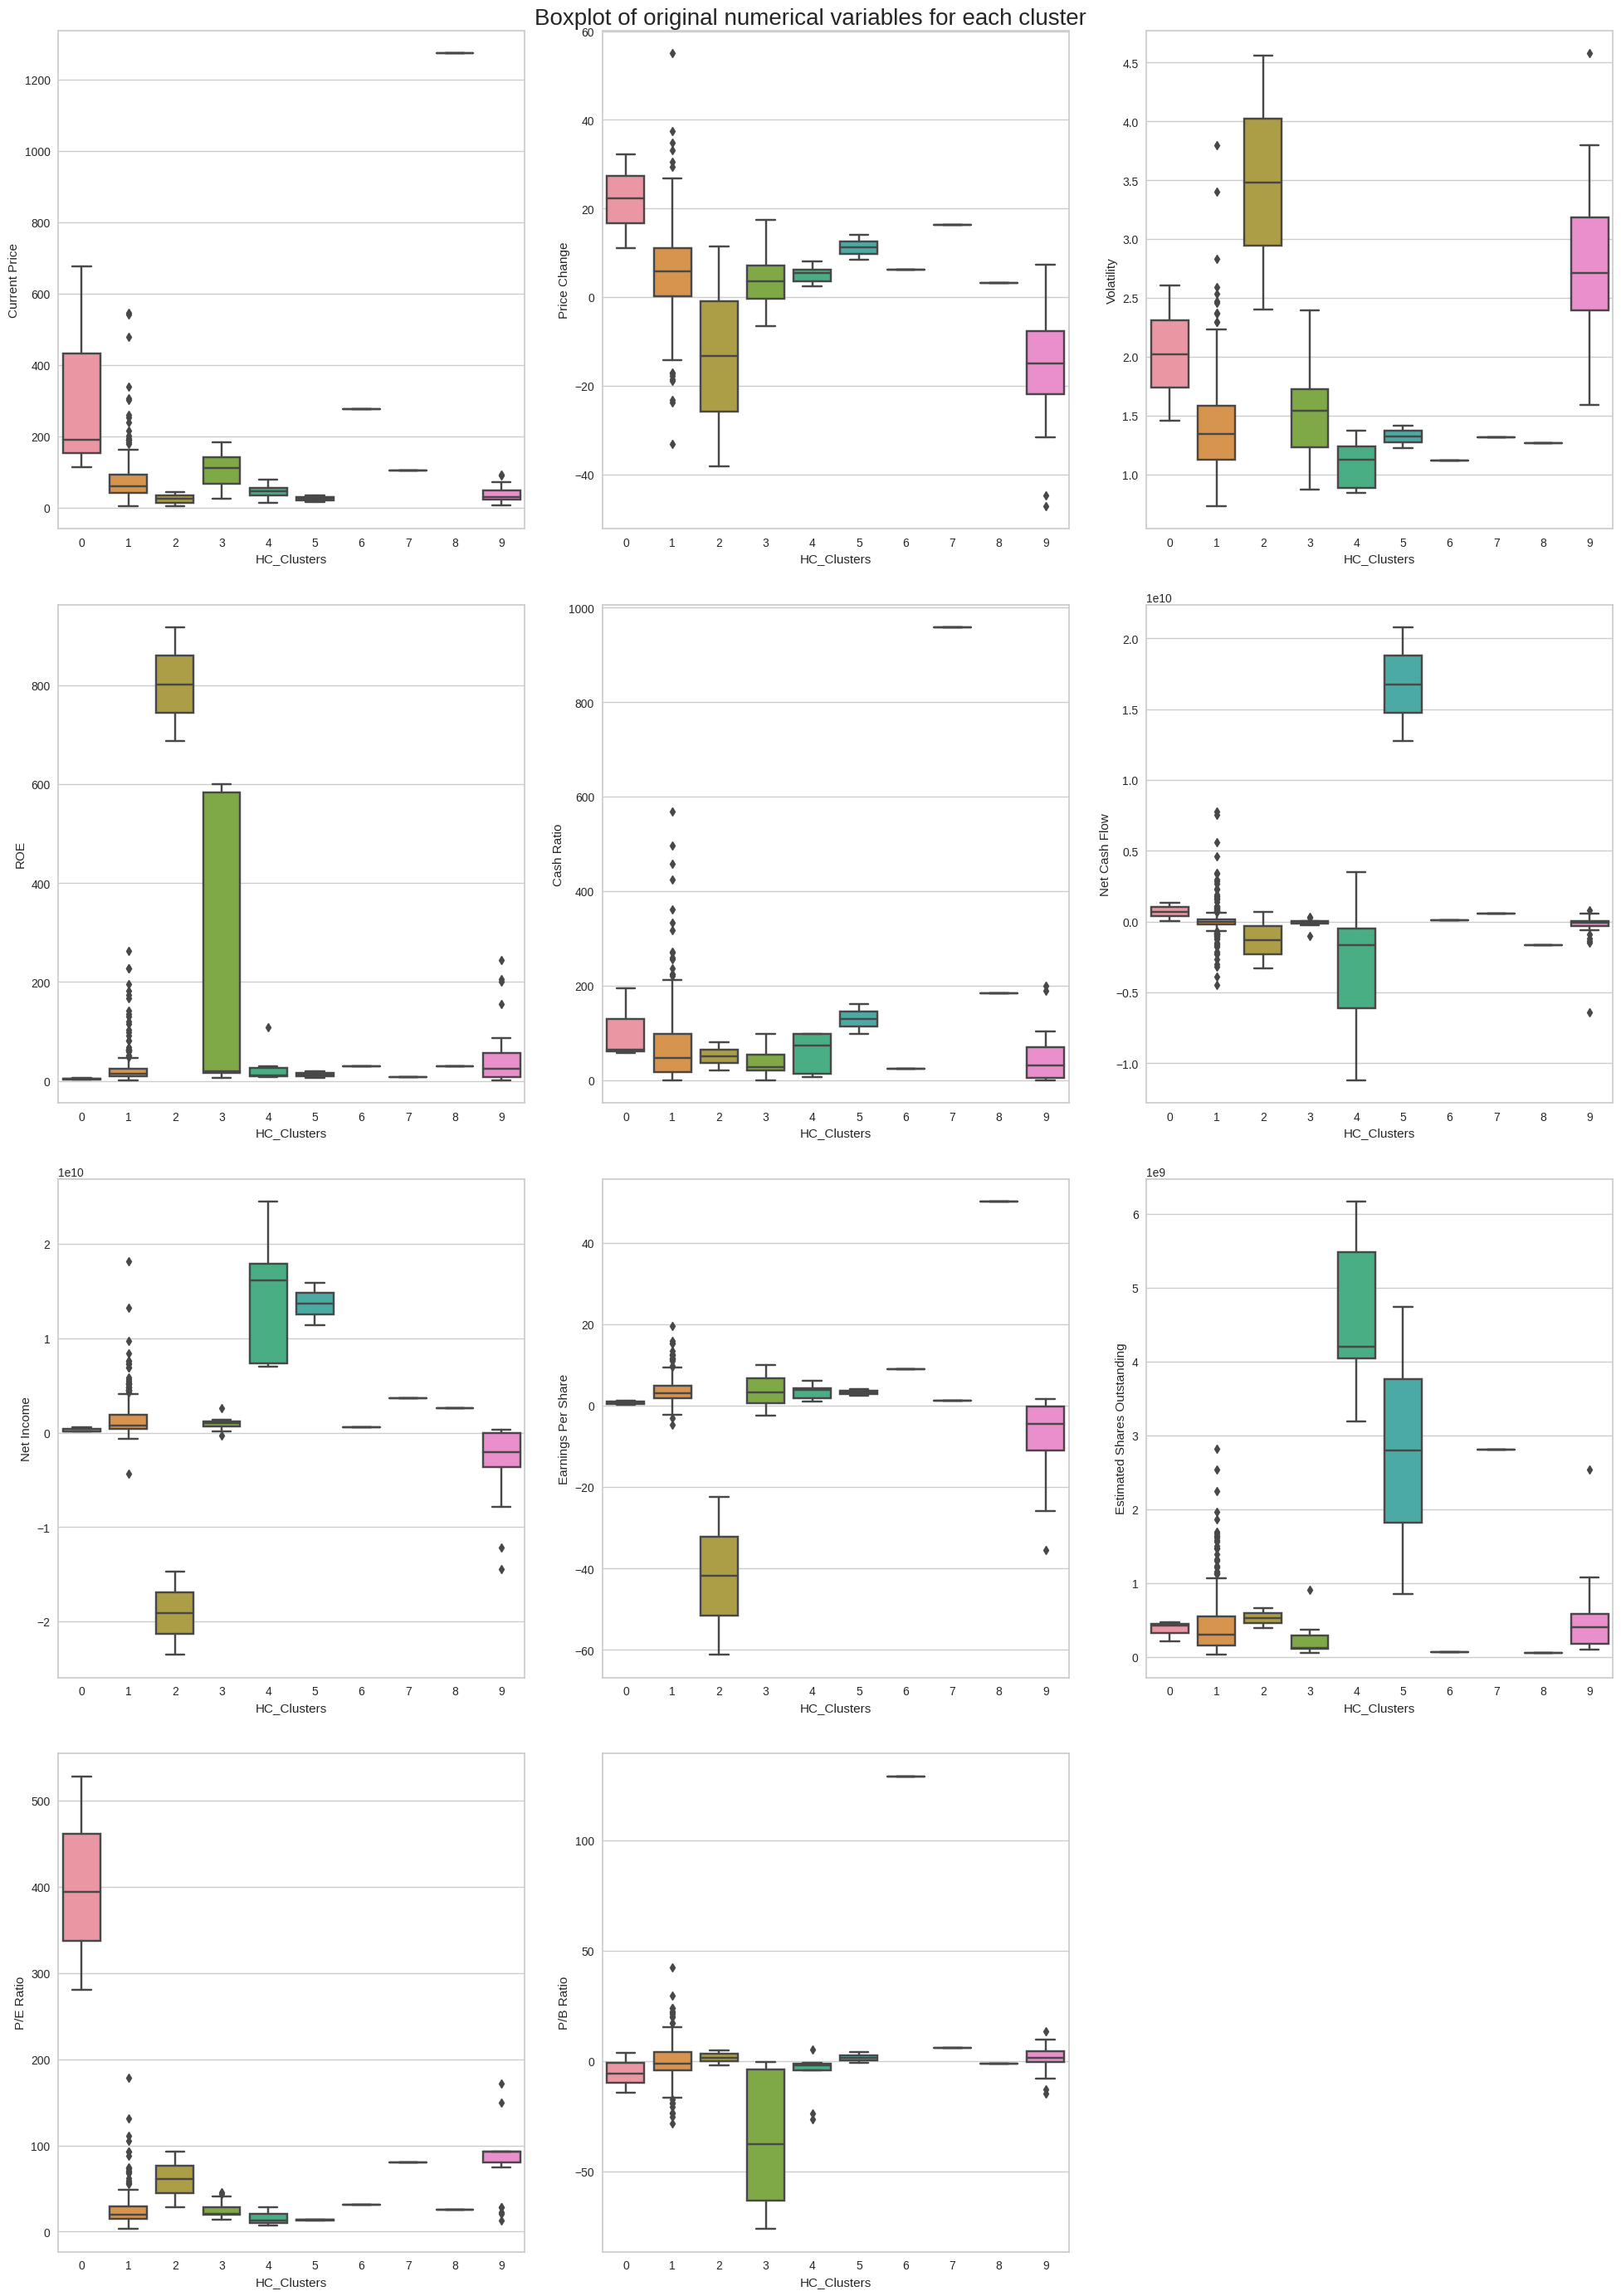

In [ ]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=trade1, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

We will look into clusters 1, 3, 4, and 9 only because the other clusters have only 1 or 2 sectors in them.

- **Cluster 1**
   - There are 285 sectors in this cluster.
   - The P/B Ratio is a -0.83 which is not bad, better if was around one, but considering 285 sectors.
   - The P/E Ratio is around 25.
   - The current price, price change, volatility, ROE, Cash Ratio, Net Cash Flow, Net Income, Earnings Per Share are all positive.
   
   
- **Cluster 3**
   - There are 12 sectors in this cluster.
   - The P/B Ratio is a -37.2, which is not good, analyst prefer around a one, so a -37.2 is not good.
   - The current price, price change, volatility, ROE, Cash Ratio, Net Income, Earnings Per Share are all positive.
   - Net Cash Flow is a negative 85 million.
   
   
- **Cluster 4**
   - There are 9 sectors in this cluster.
   - The P/B Ratio is a -6.4, an analyst prefers around a one, so a -6.4 is not good.
   - The current price, price change, volatility, ROE, Cash Ratio, Net Income, Earnings Per Share are all positive.
   - Net Cash Flow is a negative 3 billion.
   - Estimated Shares Outstanding is also 4.5 billion

- **Cluster 9**
   - There are 24 sectors in this cluster.
   - The P/B Ratio is a 1.3 which is good.
   - The current price, price change, volatility, ROE, Cash Ratio, Net Income, Earnings Per Share are all positive.
   - Net Cash Flow is a negative 414 million and Net income is negative 2.9 billion.
   - Estimated Shares Outstanding is also 486 million


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

K-means definitely was a faster techinque and with better results
Hierarachical provide more clusters but when considering the number of sectors it was cut down to 4.  
Also it was very difficult to decide the number of n, so the iterations had to run several times to determine the best n.
Two clusters out of each were closely related 283 vs 293 and 12 vs 14 observations
KMeans had 3 clusters and Hierachical has 10 but only four of the clusters were good for variability.

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [ ]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_trade1)
reduced_trade_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [ ]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.49541498949413665

- The first two principal components explain 49.5% of the variance in the data.

<Axes: xlabel='Component 1', ylabel='Component 2'>

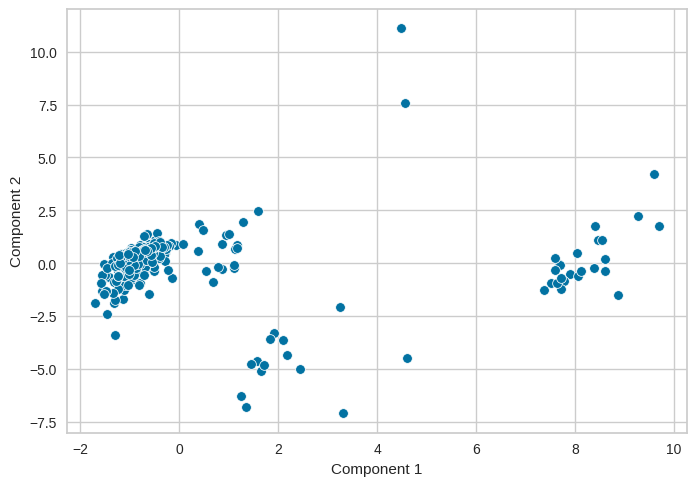

In [ ]:
sns.scatterplot(data=reduced_trade_pca, x="Component 1", y="Component 2")

- We can kind of see 3 clusters, one of which is fully formed.
- There a few outlier points too.

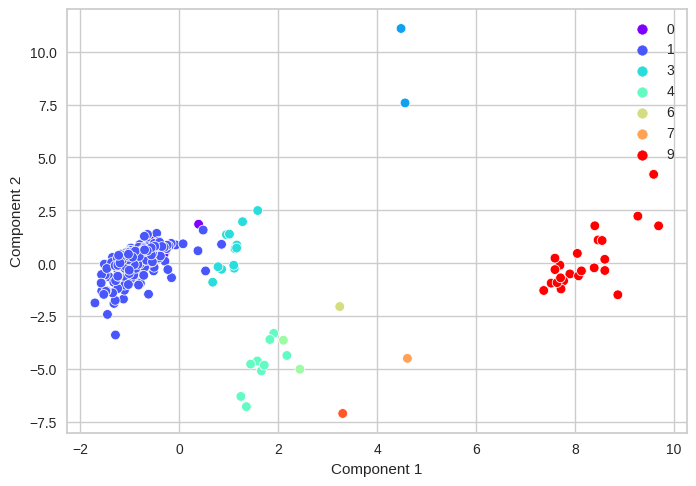

In [ ]:
sns.scatterplot(
    data=reduced_trade_pca,
    x="Component 1",
    y="Component 2",
    hue=trade1["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Cluster 1 and 9 are the major clusters.
- Cluster 3 and 4 are the minor clusters.
- The rest of the data points seem to be mostly outliers.

## Actionable Insights and Recommendations

- * The cluster analysis below, has identified stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses

- **Cluster 0**
   - There are 293 sectors in this cluster.
   - The P/B Ratio is a -2 which is not bad, better if was around one, but considering 293 sectors.
   - The P/E Ratio is around 24.4.
   - The current price (84), price change (5.6), volatility(1.4), ROE(34), Cash Ratio(67), Net Cash Flow(10.7M), Net Income(1.4B), Earnings Per Share(3.9) are all positive.
   - Estimated Shares Outstanding(426M)
   
   
- **Cluster 1**
   - There are 14 sectors in this cluster.
   - The P/B Ratio is a -3.5, analyst prefer around a one, but -3.5 isn’t too unreasonable.
   - The P/E Ratio is is around 20.6
   - The current price(52), price change(6.8), volatility(1.18), ROE(26), Cash Ratio(140), Net Cash Flow(760M), Net Income(13.4B), Earnings Per Share(3.77) are all positive.
   - Estimated Shares Outstanding (3.8B)
   
- **Cluster 2**
   - There are 33 sectors in this cluster.
   - The Earning Per Share is a -7.63, and Net Income is negative 314 million, and Price Change also negative -10.5.
   - The current price(62), volatility(2.8), ROE(93), Cash Ratio(69) are all positive.
   - Estimated Shares Outstanding (531M)

* Cluster2 has Oil & Gas Exploration & Production
Casinos & Gaming, Storage & Peripherals, Technology Hardware, Oil & Gas Equipment & Services while Cluster 1 only do not.  
* This was the main difference between Cluster 0, 1, and 2.  
* This has probably attributed to the negative Price Change, higher Volatility, negative Net Income, negative Earnings Per Share, and extremely high P/E Ratio.
* Further analyis into the aforemontioned industries would be necessary to determine the root cause of the losses.  Also cluster 2 has a high ROE and it should be investigated.
* stocks mentioned above are also at the bottom of the GICS subsectors so it can be expected that their preformance may have issues